# Programas usados en el libro

## Gráfica sección Estimación Incertidumbre

In [1]:
import numpy as np
g = 979.748
t = np.array([44,53,47,47,46,50,53])/100
t_mean = np.mean(t)
print('t_mean',t_mean)
t_diff = np.max(t)-np.min(t)
print('t_diff',t_diff)
t_e = 2*t_diff/(3*2)
print('t_e',t_e)
t_f = t_e/np.sqrt(len(t))
print('t_f',t_f)
error = np.std(t,ddof=1)/np.sqrt(len(t))
print('error',error)

print(0.5*g*t_mean**2)
print(0.5*g*(t_mean+t_f)**2)
print(0.5*g*(t_mean-t_f)**2)

t_mean 0.48571428571428577
t_diff 0.09000000000000002
t_e 0.03000000000000001
t_f 0.01133893419027682
error 0.013248026422136724
115.57027428571432
121.0292028747412
110.23731329668743


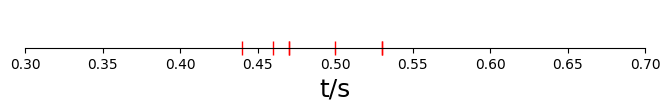

In [2]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1,1,figsize=(8,1))

data = np.copy(t)
eje = np.zeros(len(data))
ax1.plot(data,eje,'r|',ms=10)
ax1.set(yticklabels=[])  # remove the tick labels
ax1.tick_params(left=False)  # remove the ticks
ax1.set_xlabel('t/s',fontsize=18)
ax1.set_xlim(0.3,0.7)
#ax1.set_ylim(-1,1)

# use set_position
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')

plt.savefig('../docs/part2/imagenes/ejemplo-estIncertibumbre.png')
plt.show()

## Ejemplo sección Variable indirecta

In [3]:
import numpy as np
L = 1.20 # cm
eL = 0.03
Ls = np.array([L-eL,L+eL])
m = 50.0 # gramos
em = 0.1
ms = np.array([m-em,m+em])

# todas las posibilidades
rhos = []
for l1 in Ls:
    for m1 in ms:
            auxrho = m1/l1**3
            rhos.append(auxrho)
print('Todas las posibilidades en g/cm^3')
print(rhos)
print('Densidad máxima {} y densidad mínima \
      {}'.format(np.max(rhos),np.min(rhos)))


print('\nCon valores extremos:')
rhoM = (m+em)/(L+eL)**3
rhom = (m-em)/(L-eL)**3
print('Densidad máxima {} y densidad mínima \
      {}'.format(rhoM,rhom))

rho = m/L**3
errpro = abs(rhoM -rhom)/2
print('Incertidumbre promedio = {}'.format(errpro))

print('#Diferencia porcentual')
difmin = abs(np.min(rhos)-rhoM)/rhoM*100
difmax = abs(np.max(rhos)-rhom)/rhom*100
print('Dif máximos {} y dif mínimos \
      {}'.format(difmax,difmin))

print('\nUsando la propagación de errores:')
erho2rel = (em/m)**2 + 9*(eL/L)**2
erho = rho*np.sqrt(erho2rel)
print('Densidad máxima {} y densidad mínima \
      {}'.format(rho+erho,rho-erho))

print('Valor rho = {} g/cm^3'.format(rho))

Todas las posibilidades en g/cm^3
[31.156090765996534, 31.280964877283097, 26.81545752598117, 26.92293430965244]
Densidad máxima 31.280964877283097 y densidad mínima       26.81545752598117

Con valores extremos:
Densidad máxima 26.92293430965244 y densidad mínima       31.156090765996534
Incertidumbre promedio = 2.116578228172047
#Diferencia porcentual
Dif máximos 0.40080160320642266 y dif mínimos       0.3992015968063984

Usando la propagación de errores:
Densidad máxima 31.10609554188689 y densidad mínima       26.76427482848349
Valor rho = 28.93518518518519 g/cm^3


**Conclusión**: 
cada técnica arroja límites distintos, no obstante las diferencias son mínimas. Por ejemplo para el caso de mirar todas las posibilidades y mirar solo los extremos la diferencia fue inferior al 1 %. Se concluye que por practicidad se usará la técnica de los extremos.

## Ejemplo altura mesa: segunda parte

In [4]:
import numpy as np
L = 0.486 # s
eL = 0.011
Ls = np.array([L-eL,L+eL])
m = 979.748 # cm/s^2
em = 0.
ms = np.array([m-em,m+em])

# todas las posibilidades
rhos = []
for l1 in Ls:
    for m1 in ms:
            auxrho = 0.5*m1*l1**2
            rhos.append(auxrho)
print('Todas las posibilidades en cm')
print(rhos)
print('Alt máxima {} y Alt mínima \
      {}'.format(np.max(rhos),np.min(rhos)))


print('\nCon valores extremos:')
rhoM = 0.5*(m+em)*(L+eL)**2
rhom = 0.5*(m-em)*(L-eL)**2
print('Alt máxima {} y Alt mínima \
      {}'.format(rhoM,rhom))

rho = 0.5*m*L**2
errpro = abs(rhoM -rhom)/2
print('Incertidumbre promedio = {}'.format(errpro))
print('Valor alt = {} cm'.format(rho))

errrel = errpro/rho
print('Error relativo = {}'.format(errrel))

Todas las posibilidades en cm
[110.52782125, 110.52782125, 121.00328686600001, 121.00328686600001]
Alt máxima 121.00328686600001 y Alt mínima       110.52782125

Con valores extremos:
Alt máxima 121.00328686600001 y Alt mínima       110.52782125
Incertidumbre promedio = 5.237732808000004
Valor alt = 115.706279304 cm
Error relativo = 0.045267489711934186


## Ejemplo tablas y gráficas

En el experimento se pretende conocer como disminuye la velocidad de una bola de cristal rodando sobre una superficie de caucho. La velocidad inicial se obtiene con una rampa. La distancia se mide con una cinta métrica, el tiempo se extrae de los frames del video de 60 fps. El archivo es bola-rodadura.mp4. Para obtener una gráfica útil se grafica el intervalo temporal a partir de la primera toma, y se eliminar el tercer dato por ser muy sesgado.

In [5]:
import numpy as np
import pylab as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
# Datos tiempo y posición
"""
t = np.array([2.36,2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([13.0,17.0,21.0,27.0,33.5,40,47,55,69,77.5,85,93]) - 9.5 # posición en centímetros
ex = np.array([0.5,0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición
"""

t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
print('ex = {}'.format(ex))

plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
#plt.savefig('../docs/part3/imagenes/bola2.png',format='png')
plt.show()

ex = [2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4.]


In [6]:
# Linearización suponiendo que sigue la forma x -x0 = v0t -at^2

xnt = (x)/t
exnt = ex/t

plt.figure(figsize=(16,8))
plt.errorbar(t,xnt,yerr=exnt,fmt='.',ms=12,capsize=8,ecolor='r',color='k')
plt.ylabel('{x/t}$_{cm/s}$',fontsize=20)
plt.xlabel('Tiempo/s')
#plt.savefig('../docs/part3/imagenes/bola3.png',format='png')
plt.show()

In [7]:
## Mínimos cuadrados
N = len(t)
Sumax = np.sum(t)
Sumay = np.sum(xnt)
Sumax2 = np.sum(t**2)
Sumaxy = np.sum(t*xnt)
Delta = N*Sumax2-Sumax**2
c = (Sumax2*Sumay - Sumax*Sumaxy)/Delta
m = (N*Sumaxy - Sumax*Sumay)/Delta
eCU = np.sqrt((1/(N-2))*np.sum((xnt-m*t-c)**2))
ec = eCU*np.sqrt(Sumax2/Delta)
em = eCU*np.sqrt(N/Delta)

print('pendiente = {} +/- {}'.format(m,em))
print('intercepto = {} +/- {}'.format(c,ec))
print('Incertidumbre común = {}'.format(eCU))

plt.figure(figsize=(16,8))
plt.errorbar(t,xnt,yerr=exnt,fmt='.',ms= 12,capsize=8,ecolor='r',color='k')
plt.plot(t,c + m*t,'b-')
plt.ylabel('{x/t}$_{cm/s}$',fontsize=20)
plt.xlabel('Tiempo/s')
#plt.savefig('../docs/part3/imagenes/bola4.png',format='png')
plt.show()

pendiente = -8.772415597184395 +/- 0.927183470438874
intercepto = 70.7127570972936 +/- 0.746080290006485
Incertidumbre común = 1.3534511430148493


## Ejemplo histogramas
El primer ejemplo consiste en medir el diámetro de una muestra de canicas.

In [8]:
import numpy as np
import pylab as plt
Ds = np.array([15.40,16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.85,16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              15.45,17.00,16.40,16.50,15.90,15.65,15.55,16.60,15.70,15.30]) # en mm, incertidumbre de 0.05 mm

Ds2 = np.array([16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              16.40,16.50,15.90,15.65,15.55,16.60,15.70,16.85]) # en mm, incertidumbre de 0.05 mm

media = np.mean(Ds2)
devS = np.std(Ds2,ddof=1)

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.hist(Ds2, bins=[15.25,15.75,16.25,16.75,17.25], rwidth=0.98,
                   color='silver',density=False,cumulative=False,align='mid')
plt.vlines(media,0,11,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(7,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
#plt.title('Diámetro de canicas')
plt.xlabel('Diámetro/mm')
plt.ylabel(r'Número de repeticiones')
plt.legend()
plt.grid(axis='y', alpha=0.55)

print('El diámetro promedio es {:.1f} mm con una desviación estándar de {:.1f} mm.'.format(media,devS))

El diámetro promedio es 16.2 mm con una desviación estándar de 0.3 mm.


In [9]:
plt.figure(figsize=(12,6))
plt.hist(Ds2, bins=[15.25,15.75,16.25,16.75,17.25], rwidth=0.98,
                   color='silver',density=True,cumulative=False,align='mid')
plt.xlabel('Variable medida')
plt.ylabel(r'$f_i$')
plt.xticks([15.25,15.75,16.25,16.75,17.25],['$x_1$','$x_1+\Delta_1$','$\cdot\cdot\cdot x_i$','$\cdot\cdot\cdot$','$x_N$'])
plt.vlines(media,0,0.85,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(0.55,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
plt.arrow(15.25,0.25,0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.arrow(15.75,0.25,-0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.text(15.5,0.26,r'$\Delta_1$')
plt.arrow(16.25,0.25,0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.arrow(16.75,0.25,-0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.text(16.5,0.26,r'$\Delta_i$')
plt.grid(axis='y', alpha=0.55)
plt.legend()
plt.savefig('../docs/part4/imagenes/binHisto.png',format='png')
plt.show()

El segundo ejemplo consiste en medir la altura de unos estudiantes. Es un ejemplo ficticio, los valores salen de multiplicar por 10 y redondear los diámetros de los estudiantes.

In [10]:
from collections import Counter
# Altura estudiantes en cm
Ds3 = np.array([16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              16.40,16.50,15.90,15.65,15.55,16.60,15.70,16.85])*10
Ds3 = np.round(Ds3) # En enteros
media = np.mean(Ds3)
devS = np.std(Ds3,ddof=1)
DS = Counter(Ds3) # Determina el número de repeticiones y almacena en lista

Dm = np.arange(155,170,1) # Alturas a graficar
### Extrae un vector de repeticiones
R = []
for ii in range(len(Dm)):
    R.append(DS[Dm[ii]])
###
    
F = R/np.sum(R) # Fracciones

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.bar(Dm,100*F,width=0.5,color='silver')
plt.vlines(media,0,25,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(12,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
#plt.title('Altura estudiantes')
plt.xlabel('Altura/cm')
plt.ylabel('Fracción/%')
plt.legend()
plt.grid(axis='y', alpha=0.55)

print('El diámetro promedio es {:.1f} cm con una desviación estándar de {:.1f} cm.'.format(media,devS))

El diámetro promedio es 161.6 cm con una desviación estándar de 3.3 cm.


In [11]:
import matplotlib
import pylab as plt
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.bar(Dm,F,width=0.5,color='silver')
plt.vlines(media,0,0.25,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(0.12,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
plt.xlabel('Variable medida')
plt.ylabel('Fracción $F_i$')
plt.xticks(Dm, ['$x_1$','$x_2$','$x_3$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$x_{i-1}$','$x_i$',
                '$x_{i+1}$','$x_{i+2}$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$x_{M-1}$','$x_M$'])
plt.grid(axis='y', alpha=0.55)   
plt.legend()
plt.savefig('../docs/part4/imagenes/barHisto.png',format='png')
plt.show()

## Ejemplo distribución binomial

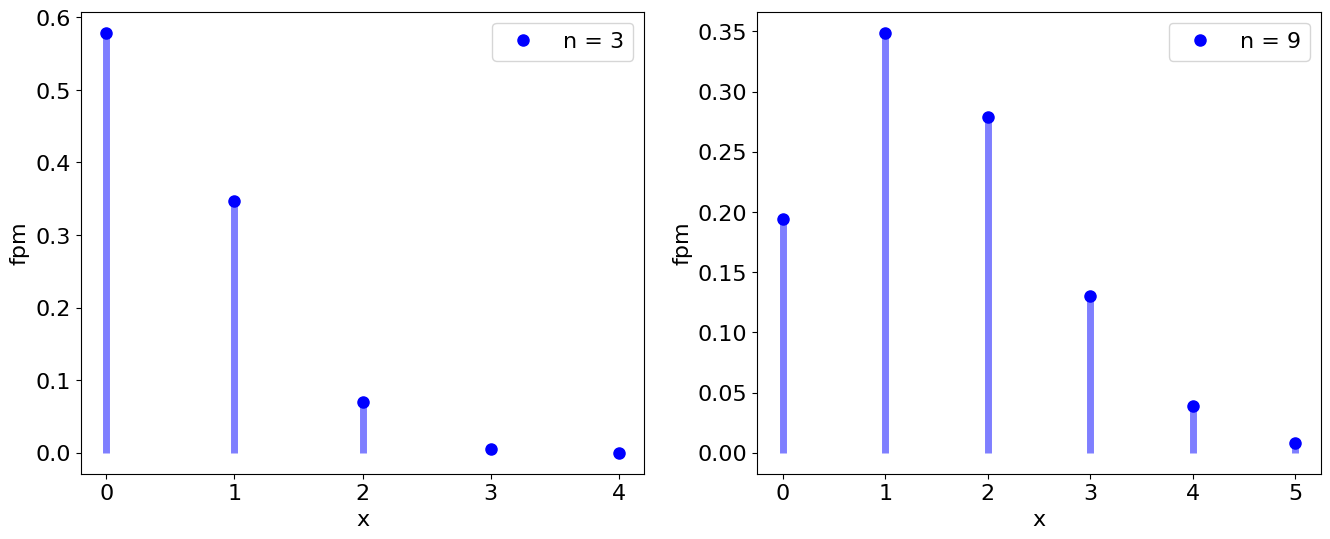

In [12]:
from scipy.stats import binom
import pylab as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 16})
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(16,6))

n , p = 3 , 1/6
x = np.arange(0,5)
ax1.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label=r'n = {}'.format(n))
ax1.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('fpm')

n , p = 9 , 1/6
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.999, n, p))
ax2.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label=r'n = {}'.format(n))
ax2.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('fpm')
plt.savefig('../docs/part4/imagenes/binom-fpm.svg',format='svg')
plt.show()

## Ejemplo histograma con N tendiendo a infinito

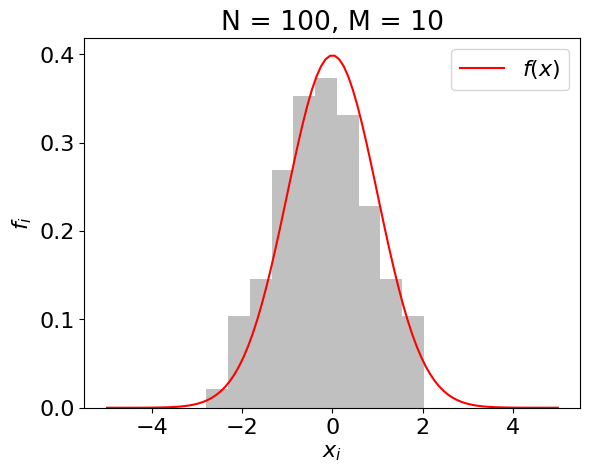

In [13]:
## VERSIÓN CON SCIPY ##

#### Valores a cambiar ###
##########################
N = 100    # Tamaño muestra
M = 10      # Número de intervalos
##########################

import numpy as np
import pylab as plt
from scipy.stats import norm
plt.rcParams.update({'font.size': 16})

np.random.seed(0)
conjunto = np.random.normal(loc=0,scale=1,size=N)
infoHist = plt.hist(conjunto,bins=M,density=True,align='left',
                   color='silver')
x = np.linspace(-5,5,100)
plt.plot(x,norm.pdf(x,loc=0,scale=1),color='r',label=r'$f(x)$')
plt.title(r'N = {}, M = {}'.format(N,M))
plt.xlabel(r'$x_i$')
plt.ylabel(r'$f_i$')
plt.legend()
plt.show()

In [14]:
## VERSIÓN SIN SCIPY ##

#### Valores a cambiar ###
##########################
N = 100    # Tamaño muestra
M = 15      # Número de intervalos
##########################

import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 16})

def normal(x,loc=0,scale=1):
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

np.random.seed(0)
conjunto = np.random.normal(loc=0,scale=1,size=N)
infoHist = plt.hist(conjunto,bins=M,density=True,align='left',
                   color='silver')
x = np.linspace(-5,5,100)
plt.plot(x,normal(x,loc=0,scale=1),color='r',label=r'$f(x)$')
plt.title(r'N = {}, M = {}'.format(N,M))
plt.xlabel(r'$x_i$')
plt.ylabel(r'$f_i$')
plt.legend()
plt.savefig('imagenes/normala-1.png')
plt.show()

## Ejemplo de distribución normal

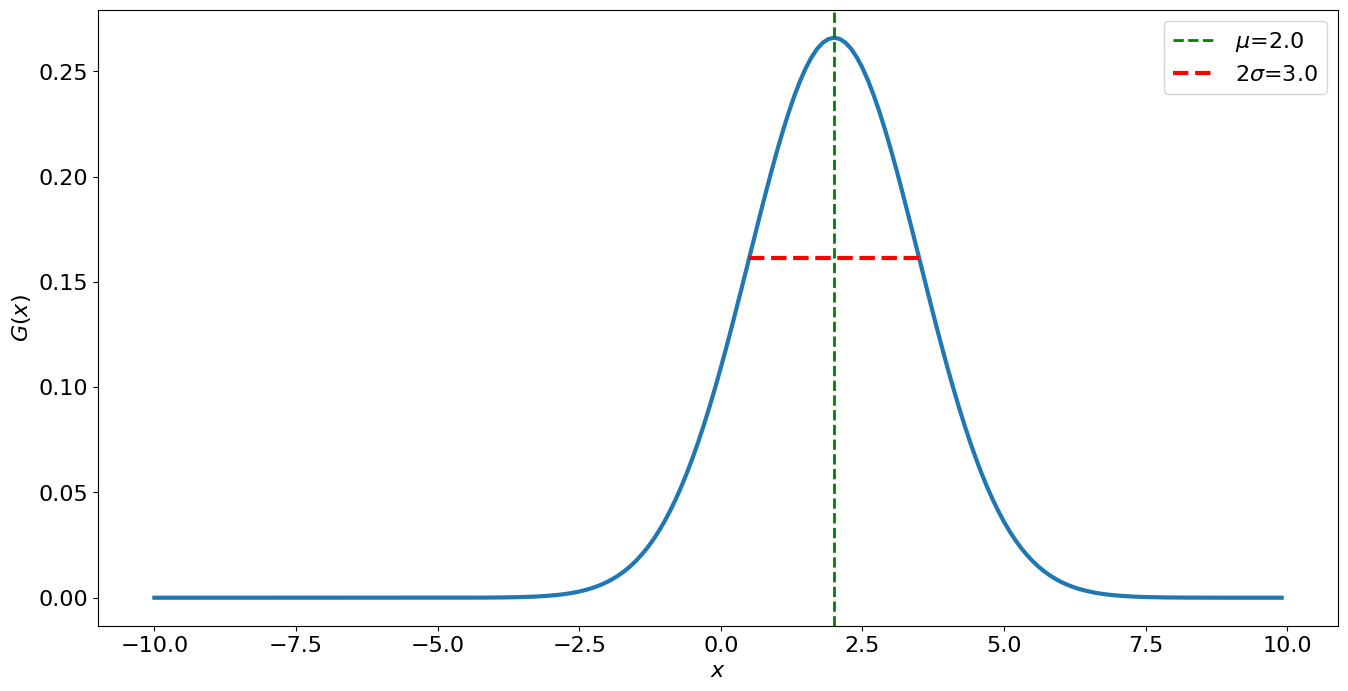

In [15]:

mu = 2.0 # media aritmética
sigma = 1.5 # desviación estándar

import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 16})

x = np.arange(-10,10,0.1)
G = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.figure(figsize=(16,8))
plt.plot(x,G,linewidth=3)
plt.ylabel('$G(x)$')
plt.axvline(mu, linestyle='--', linewidth=2, c="green", label='$\mu$=%.1f'%mu)
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='$2\sigma$=%.1f'%(2*sigma))
plt.legend()
plt.xlabel('$x$')
plt.savefig('imagenes/distNormal.png')
plt.show()

Frecuencia grabación fs = 44100.0 datos/s
Número de datos = 413696
Duración = 9.4 s
Muestreo temporal = 0.000023 s


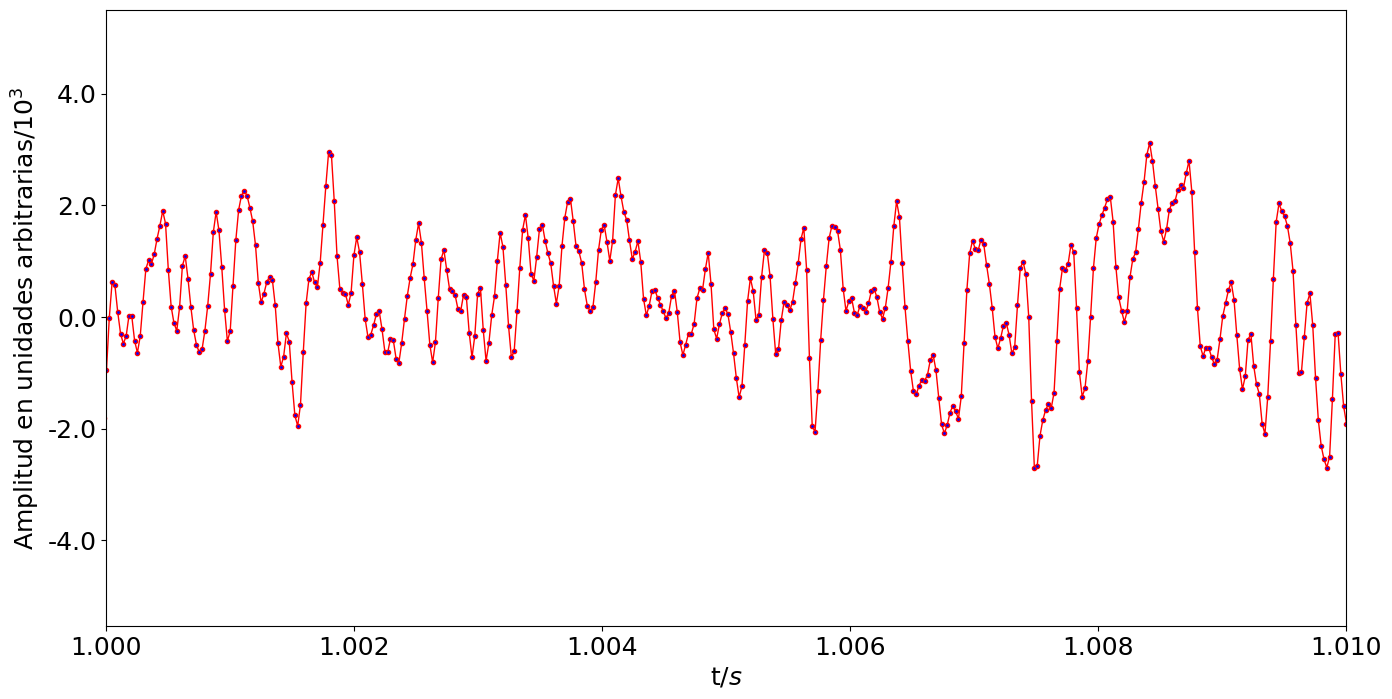

In [16]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import matplotlib
import IPython.display as ipd
from scipy.stats import norm
plt.rcParams.update({'font.size': 18})

fs, data = wavfile.read('audios/estatica.wav')
data = data[:,0]

tamdata = data.size
duration = tamdata/fs
dt = duration/tamdata
t = np.arange(0,duration,dt)

print('Frecuencia grabación fs = %.1f datos/s' % fs)
print('Número de datos = %.f' % tamdata)
print('Duración = %.1f s'  % duration)
print('Muestreo temporal = %f s' % dt)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(t,data/1000,lw=1,color='r',marker='.',ms=6,markerfacecolor='blue')
#plt.title('Ruido estática')
plt.ylabel('Amplitud en unidades arbitrarias/$10^3$',fontsize=18)
plt.xlabel(r't/$s$',fontsize=18)
plt.xlim(1,1.01)
ax.yaxis.set_major_formatter('{x:.1f}')
plt.savefig('imagenes/estatica.svg')
plt.show()

ipd.Audio('audios/estatica.wav') # load a local WAV file

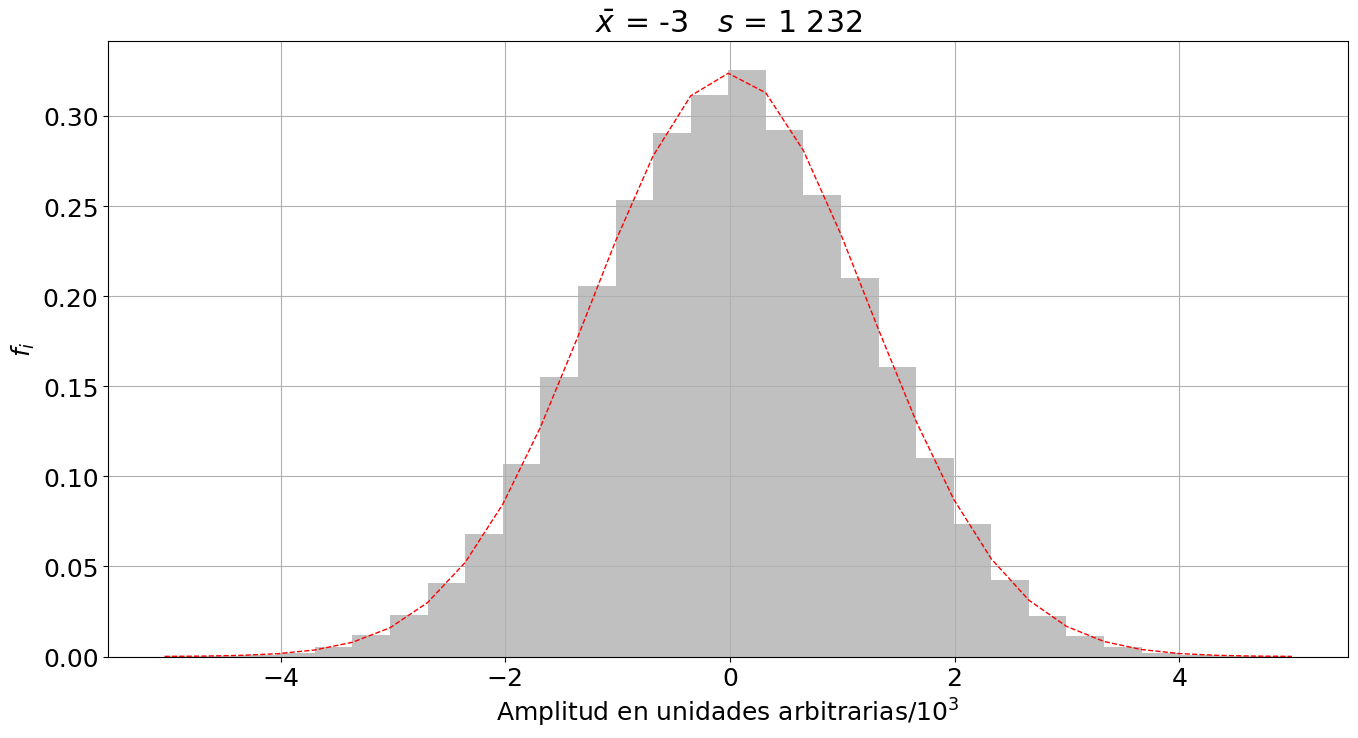

In [17]:
import numpy as np
import pylab as plt
from scipy.io import wavfile
from scipy.stats import norm
plt.rcParams.update({'font.size': 18})

# Datos de la distribución e histograma
s, data = wavfile.read('audios/estatica.wav')
data = data[:,0]/1000
M = 30
plt.figure(figsize=(16,8))
n, bins, patches = plt.hist(data, bins=M,density=True,align='mid',
                   color='silver')

# Parámetros y función densidad de probabilidad
mu = np.mean(data)
sigma = np.std(data)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Amplitud en unidades arbitrarias/$10^3$')
plt.ylabel('$f_i$')
plt.title(r'$\bar x$ = {:.0f},  $s$ = {:,.0f}'.format(mu*1000,sigma*1000).replace(',',' '))
plt.grid(True)
plt.savefig('imagenes/estatica-hist.svg')
plt.show()

## Distribución de Poisson

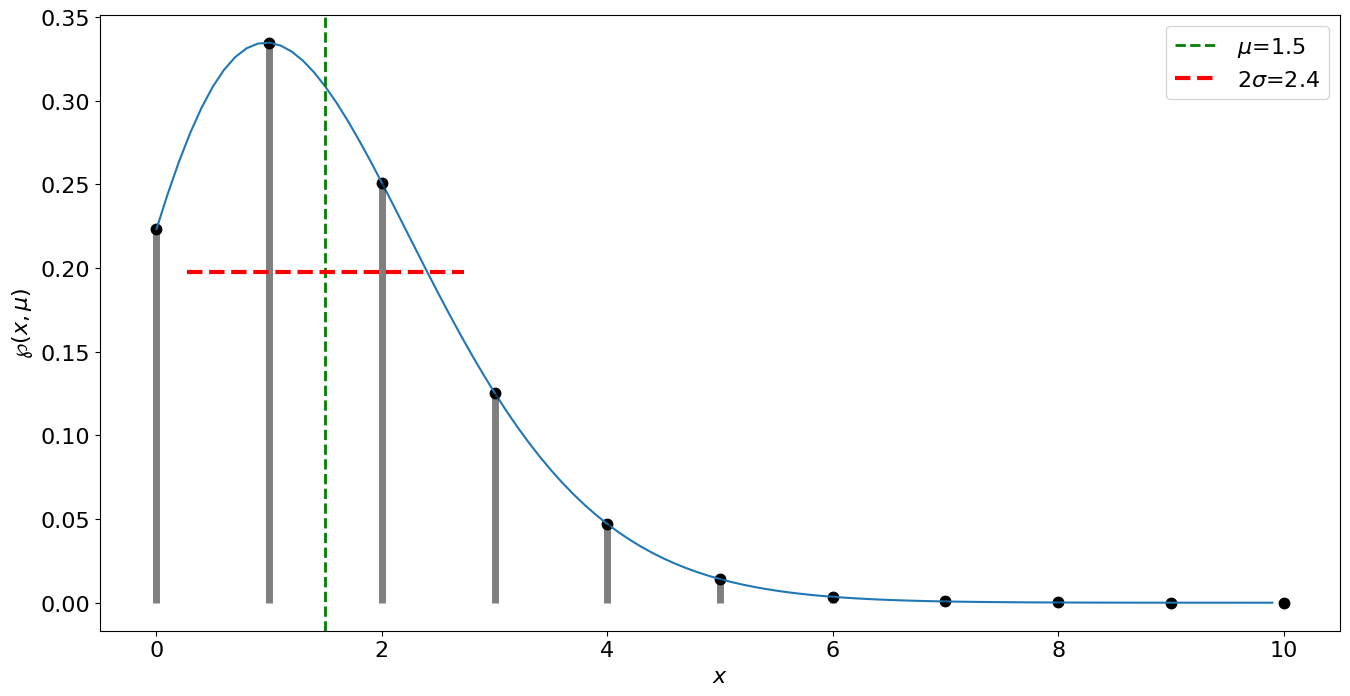

In [18]:

mu = 1.5 # media aritmética
rango = 10 # valor máximo a graficar


import numpy as np
from scipy.special import factorial
import pylab as plt
plt.rcParams.update({'font.size': 16})

sigma = np.sqrt(mu)
x = np.arange(0,rango,0.1)
xdisc = np.arange(0,rango+1,1.0)

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

plt.figure(figsize=(16,8))
plt.plot(xdisc,distP(mu,xdisc),'k.',ms=15)
plt.plot(x,distP(mu,x))
plt.vlines(xdisc,0, distP(mu,xdisc), colors='k', lw=5, alpha=0.5)
plt.axvline(mu, linestyle='--', linewidth=2, c="green", label='$\mu$=%.1f'%mu)
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='$2\sigma$=%.1f'%(2*sigma))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$\wp(x,\mu)$')
plt.savefig('imagenes/distPoisson.svg')
plt.show()

## Ejemplo distribución Poisson

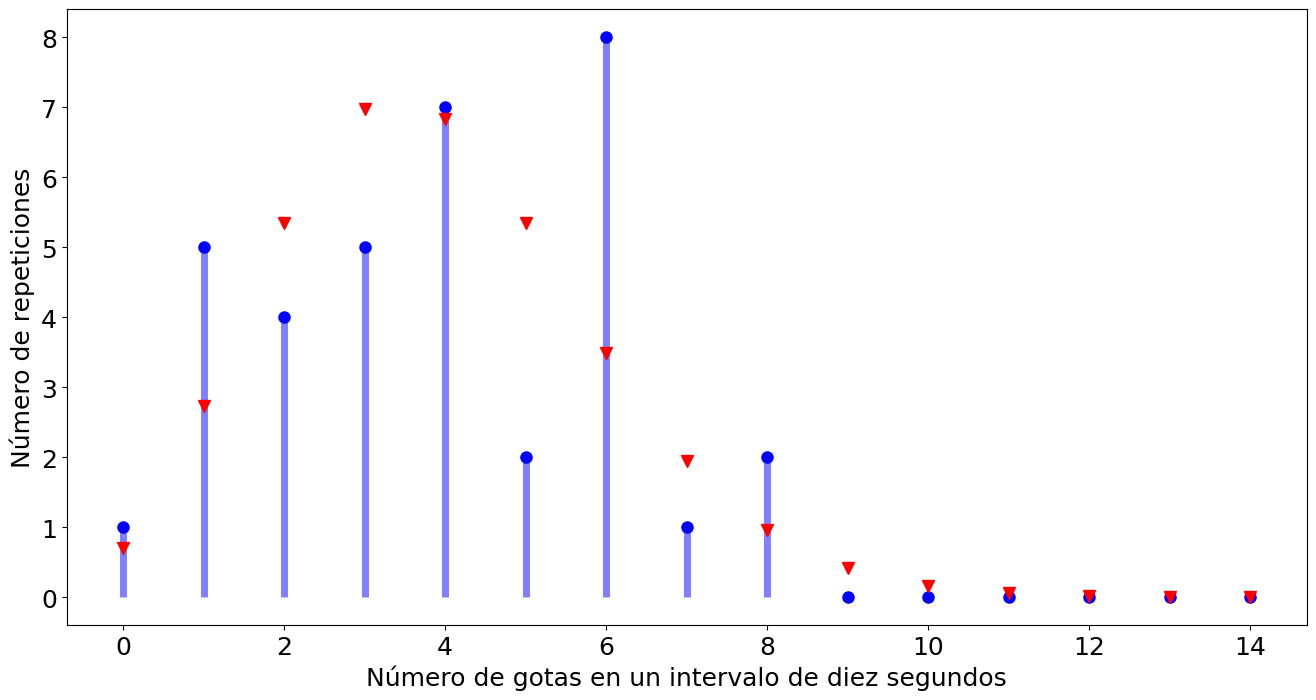

Total de medidas = 35
Media de gotas en un intervalo de 10 segundos = 3.9143
Desviación estándar de la media de gotas en un intervalo de 10 segundos = 2.1471
Desviación estándar suponiendo que es una distribución de Poisson = 1.9785
Probabilidad de que caigan tres gotas en un intervalo de 10 segundos = 19.95 %
Probabilidad de que caigan once gotas en un intervalo de 10 segundos = 0.17 %
Probabilidad de que caigan entre cero y seis gotas en un intervalo de 10 segundos = 79.84 %
Probabilidad de que caigan siete o más gotas en un intervalo de 10 segundos = 20.16 %
Probabilidad que en las 35 mediciones siempre caigan once gotas = 4.29e-96 %
Probabilidad que en las 35 mediciones nunca caigan once gotas = 94.38 %
Probabilidad que en las 35 mediciones en alguna caiga once gotas = 5.62 %


In [19]:
import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 18})

def poisson(x,mu):
    aux = np.zeros(x+1)
    aux[0] = np.exp(-mu)
    for xx in range(1,x+1):
        aux[xx] = aux[xx-1]*mu/xx
    return aux
        

#datos = np.array([4,4,5,3,1,3,11,6,6,2,11,1,6,2,1,3,6,5,7,3,4,8,6,6,0,1,2,1,6,3,4,8,4,4,2,4,6])
datos = np.array([4,4,5,3,1,3,6,6,2,1,6,2,1,3,6,5,7,3,4,8,6,6,0,1,2,1,6,3,4,8,4,4,2,4,6])
N = len(datos)
mu = np.mean(datos)
valH = 15
probs = poisson(valH-1,mu)
x = np.arange(0,valH)
reps = np.zeros(valH)
for ii in range(valH):
    reps[ii] = np.count_nonzero(datos == ii)

fig, ax = plt.subplots(1,1,figsize=(16,8))    
ax.plot(x, reps, 'bo', ms=8)
ax.vlines(x, 0, reps, colors='b', lw=5, alpha=0.5)
ax.plot(x, probs*N, 'rv', ms=8)
ax.set_xlabel('Número de gotas en un intervalo de diez segundos')
ax.set_ylabel('Número de repeticiones')
plt.savefig('imagenes\gotasPoisson.svg')
plt.show()


print('Total de medidas = {:.0f}'.format(N))
print('Media de gotas en un intervalo de 10 segundos = {:.4f}'.format(mu))
dev = np.std(datos,ddof=1)
print('Desviación estándar de la media de gotas en un intervalo de 10 segundos = {:.4f}'.format(dev))

dev = np.sqrt(mu)
print('Desviación estándar suponiendo que es una distribución de Poisson = {:.4f}'.format(dev))

prob3 = probs[3]
print('Probabilidad de que caigan tres gotas en un intervalo de 10 segundos = {:.2f} %'.format(prob3*100))

prob11 = probs[11]
print('Probabilidad de que caigan once gotas en un intervalo de 10 segundos = {:.2f} %'.format(prob11*100))

prob06 = np.sum(probs[0:6])
print('Probabilidad de que caigan entre cero y seis gotas en un intervalo de 10 segundos = {:.2f} %'.format(prob06*100))

prob7inf = 1 - np.sum(probs[0:6])
print('Probabilidad de que caigan siete o más gotas en un intervalo de 10 segundos = {:.2f} %'.format(prob7inf*100))

probS11 = probs[11]**N
print('Probabilidad que en las {} mediciones siempre caigan once gotas = {:.2e} %'.format(N,probS11*100))

probN11 = (1-probs[11])**N
print('Probabilidad que en las {} mediciones nunca caigan once gotas = {:.2f} %'.format(N,probN11*100))

probA11 = 1 - (1-probs[11])**N
print('Probabilidad que en las {} mediciones en alguna caiga once gotas = {:.2f} %'.format(N,probA11*100))

In [20]:
# Suponiendo ahora que se midió una sola vez en un tiempo correspondiente a $N$ por 10 segundos.

# La mejor aproximación al promedio de gotas será:
Mu = np.sum(datos)
print('Mejor promedio de gotas en una medida de {:.2f} segundos es {}'.format(N*10,Mu))

devMu = np.sqrt(Mu)
print('La desviación estándar para este promedio es {:.2f}'.format(devMu))

# A parti de los datos anteriores se puede estimar la media y desviación estándar para un intervalo de 10 segundos
mu2 = Mu/N
err2 = devMu/N
print('La media calculada sería {:.2f} con una incertidumbre de {:.2f}'.format(mu2,err2))

# Si ahora queremos aplicar la distribución con el nuevo promedio nos faltaría determinar la desviación estándar
dev2 = np.sqrt(mu2)
print('La desviación estándar de la distribución con media {:.2f} será {:.2f}'.format(mu2,dev2))

Mejor promedio de gotas en una medida de 350.00 segundos es 137
La desviación estándar para este promedio es 11.70
La media calculada sería 3.91 con una incertidumbre de 0.33
La desviación estándar de la distribución con media 3.91 será 1.98


## Experimento conteo

In [21]:
# Conteo de gotas en un intervalo de dos minutos
X = np.sum(datos[0:11])
print('Gotas en un intervalo de dos minutos, X = {:.2f}'.format(X))
Xe = np.sqrt(X)
print('La incertidumbre en el promedio de gotas es {:.2f}'.format(Xe))
R = X/12
Re = Xe/12
print('La razón de cambio por decasegundos es {:.2f} +/- {:.2f}'.format(R,Re))

T = 12
Te = 0.1
Ren = R*np.sqrt((Xe/X)**2 + (Te/T)**2)
print('La razón de cambio por decasegundos, con incertidumbre en el tiempo, es {:.2f} +/- {:.2f}'.format(R,Ren))

Gotas en un intervalo de dos minutos, X = 41.00
La incertidumbre en el promedio de gotas es 6.40
La razón de cambio por decasegundos es 3.42 +/- 0.53
La razón de cambio por decasegundos, con incertidumbre en el tiempo, es 3.42 +/- 0.53


## Ejemplo teorema del límite central

Uniforme: media = 2.0782, desv = 0.4916

Uniforme para 5
s_dist = 0.2148
s = 0.2236
Diferencia =   3.96 %
media = 2.0917

Uniforme para 30
s_dist = 0.089
s = 0.091
Diferencia =   1.96 %
media = 2.1012

Normal: media = 2.0761, desv = 0.5022



Normal para 5
s_dist = 0.216
s = 0.224
Diferencia =   3.22 %
media = 2.1047

Normal para 30
s_dist = 0.086
s = 0.091
Diferencia =   5.44 %
media = 2.0988

Poisson: media = 2.1240, desv = 1.4801

Poisson para 5
s_dist = 0.649
s = 0.648
Diferencia =   0.19 %
media = 2.1276

Poisson para 30
s_dist = 0.273
s = 0.265
Diferencia =   3.17 %
media = 2.0930


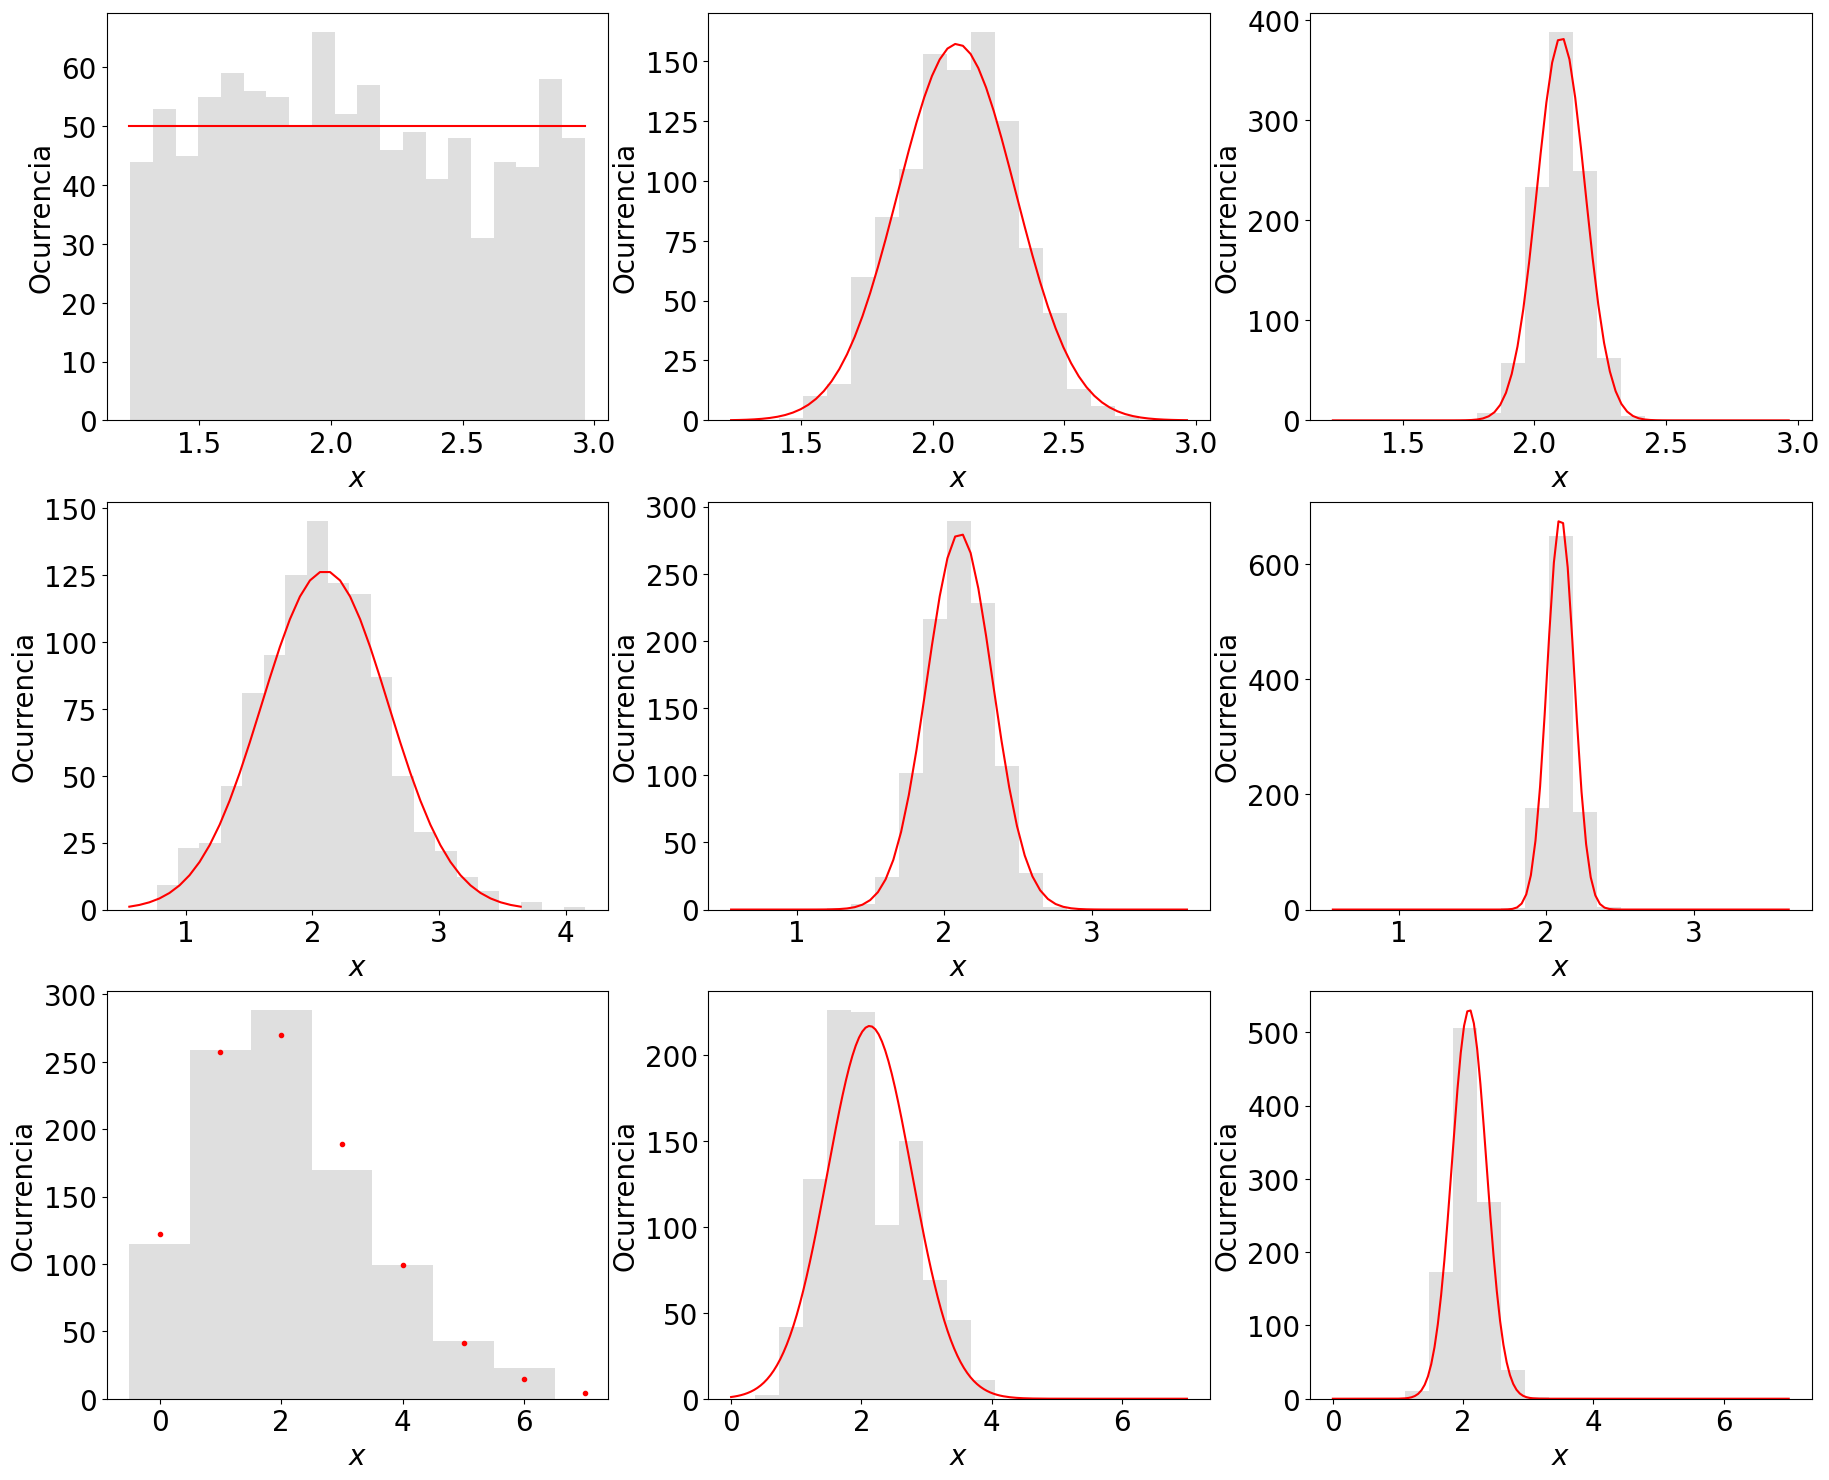

In [22]:
###### Parámetros ##################################################
media = 2.10      # media de la distribución
desv = 0.50       # Desviación estándar de la distribución
N = 1000         # Número de datos de la muestra de la distribución
semilla = 2      # Semilla usada para la generación de las variables aleatorias
n = 20           # Número de intervalos (bins) a graficas en los histogramas
grupA = 5        # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 2)
grupB = 30       # # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 3)
####################################################################

import numpy as np
import pylab as plt
from scipy import stats
from scipy.special import factorial
plt.rcParams.update({'font.size': 20})
np.random.seed(semilla)
figs, axs = plt.subplots(3,3,figsize=(22,18))

def diferP(val0,val):
    return 100*abs(val0-val)/val0


### Distribución Uniforme ###
#############################

def pdfUniform(media,desv):
    b = media + np.sqrt(12)*desv/2
    a = 2*media - b
    pdf = 1/(b-a)
    return a,b,pdf

# Creación de distribución aleatoria
a,b,pdfUni = pdfUniform(media,desv)
alUniforme = np.random.uniform(a,b,size=N)
print('Uniforme: media = {:.4f}, desv = {:.4f}'.format(np.mean(alUniforme),np.std(alUniforme)))

## Creación de funciones de densidad
x = np.linspace(a,b,n)
dUni = N/(pdfUni*n)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(np.random.uniform(a,b,grupA)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(np.random.uniform(a,b,grupB)))

## Grafica
axs[0,0].hist(alUniforme,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[0,0].plot(x,dUni*pdfUni*np.ones(n),color='r')
#axs[0,0].set_title(r'$\bar x$ = {:.1f}, $s$ = {:.1f}'.format(media,desv))

# Agrupación A
bins = np.linspace(a,b,n)
axs[0,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvA = desv/np.sqrt(grupA)
mediaA = np.mean(UniA)
bins = np.linspace(a,b,3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[0,1].plot(bins,fUniforme2*dnormal,'r')
#axs[0,1].set_title(r'$\bar x$ = {:.1f}, $s$ = {:.1f}'.format(mediaA,desvA))
print('\nUniforme para {:.0f}'.format(grupA))
print('s_dist = {:.4f}'.format(np.std(UniA)))
print('s = {:.4f}'.format(desvA))
print('Diferencia =   {:.2f} %'.format(diferP(desvA,np.std(UniA))))
print('media = {:.4f}'.format(mediaA))

# Agrupación B
bins = np.linspace(a,b,n)
axs[0,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvB = desv/np.sqrt(grupB)
mediaB = np.mean(UniB)
bins = np.linspace(a,b,4*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 4*len(UniB)*(bins[1]-bins[0])
axs[0,2].plot(bins,fUniforme2*dnormal,'r')
#axs[0,2].set_title(r'$\bar x$ = {:.1f}, $s$ = {:.1f}'.format(mediaB,desvB))
print('\nUniforme para {:.0f}'.format(grupB))
print('s_dist = {:.3f}'.format(np.std(UniB)))
print('s = {:.3f}'.format(desvB))
print('Diferencia =   {:.2f} %'.format(diferP(desvB,np.std(UniB))))
print('media = {:.4f}'.format(mediaB))


### Distribución normal ###
###########################

# creación distribución aletoria
alnormal = stats.norm.rvs(loc=media,scale=desv,size=N,random_state=semilla)
print('\nNormal: media = {:.4f}, desv = {:.4f}'.format(np.mean(alnormal),np.std(alnormal)))

# creación de función densidad
x1 = np.linspace(stats.norm.ppf(0.001,loc=media,scale=desv),stats.norm.ppf(0.999,loc=media,scale=desv), 2*n)
fnormal = stats.norm.pdf(x1,loc=media,scale=desv)
dnormal = 2*N*(x1[1]-x1[0])

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupA,random_state=None)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupB,random_state=None)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
        
# Grafica
axs[1,0].hist(alnormal,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[1,0].plot(x1,fnormal*dnormal,'r')

# Agrupación A
bins = np.linspace(x1[0],x1[-1],n)
axs[1,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[1,1].plot(bins,fUniforme2*dnormal,'r')
print('\nNormal para {:.0f}'.format(grupA))
print('s_dist = {:.3f}'.format(np.std(UniA)))
print('s = {:.3f}'.format(desvA))
print('Diferencia =   {:.2f} %'.format(diferP(desvA,np.std(UniA))))
print('media = {:.4f}'.format(mediaA))

# Agrupación B
bins = np.linspace(x1[0],x1[-1],n)
axs[1,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],5*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 5*len(UniB)*(bins[1]-bins[0])
axs[1,2].plot(bins,fUniforme2*dnormal,'r')
print('\nNormal para {:.0f}'.format(grupB))
print('s_dist = {:.3f}'.format(np.std(UniB)))
print('s = {:.3f}'.format(desvB)) 
print('Diferencia =   {:.2f} %'.format(diferP(desvB,np.std(UniB))))
print('media = {:.4f}'.format(mediaB))
    
        
### Distribución de Poisson ###
###############################

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

# creación distribución aleatorioa
#alpoisson = stats.poisson.rvs(media,loc=0,size=N,random_state=semilla)
#alpoisson = np.random.Generator.poisson(media,N)
rng = np.random.default_rng()
alpoisson = rng.poisson(media,N)
print('\nPoisson: media = {:.4f}, desv = {:.4f}'.format(np.mean(alpoisson),np.std(alpoisson)))

# creación de función densidad
x2 = np.arange(stats.poisson.ppf(0.001,media),stats.poisson.ppf(0.999,media))
#fpoisson = stats.poisson.pmf(x2,media)
fpoisson = distP(media,x2)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(rng.poisson(media,grupA)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(rng.poisson(media,grupB)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
desvA = np.sqrt(media/grupA)
desvB = np.sqrt(media/grupB)
        
# Grafica
nn,bini,pp = axs[2,0].hist(alpoisson,bins=x2, histtype='stepfilled', align='left',color='silver', alpha=0.5)
axs[2,0].plot(x2,fpoisson*N,'r.')

# Agrupación A
bins = np.linspace(x2[0],x2[-1],n)
axs[2,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
fUniforme3 = stats.norm.pdf(bins,loc=mediaA,scale=np.std(UniA))
dnormal = 7*len(UniA)*(bins[1]-bins[0])
axs[2,1].plot(bins,fUniforme2*dnormal,'r')
#axs[2,1].plot(bins,fUniforme3*dnormal,'gray')
print('\nPoisson para {:.0f}'.format(grupA))
print('s_dist = {:.3f}'.format(np.std(UniA)))
print('s = {:.3f}'.format(desvA))
print('Diferencia =   {:.2f} %'.format(diferP(desvA,np.std(UniA))))
print('media = {:.4f}'.format(mediaA))

# Agrupación B
bins = np.linspace(x2[0],x2[-1],n)
axs[2,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
fUniforme3 = stats.norm.pdf(bins,loc=mediaB,scale=np.std(UniB))
dnormal = 7*len(UniB)*(bins[1]-bins[0])
axs[2,2].plot(bins,fUniforme2*dnormal,'r')
#axs[2,2].plot(bins,fUniforme3*dnormal,'gray')
print('\nPoisson para {:.0f}'.format(grupB))
print('s_dist = {:.3f}'.format(np.std(UniB)))
print('s = {:.3f}'.format(desvB))
print('Diferencia =   {:.2f} %'.format(diferP(desvB,np.std(UniB))))
print('media = {:.4f}'.format(mediaB))

for ax in axs.flat:
    ax.set(xlabel='$x$', ylabel='Ocurrencia')
plt.savefig('imagenes/TLC.svg')
plt.show()

## Reproducción ejemplo distribución Poisson en Hughes 2010, figura 3.7 


Poisson para 5
s_dist = 0.30
s = 0.32
Diferencia =   3.79 %

Poisson para 30
s_dist = 0.127
s = 0.129
Diferencia =   1.37 %


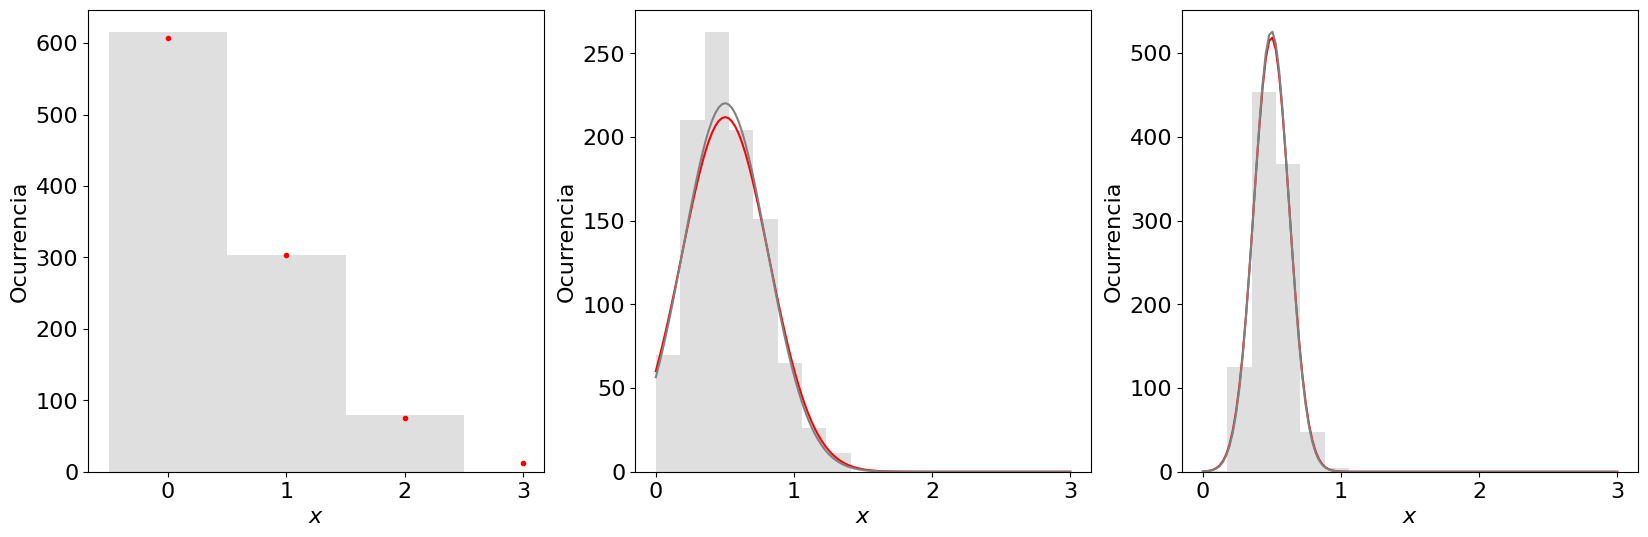

In [23]:
###### Parámetros ##################################################
media = 0.5      # media de la distribución
N = 1000         # Número de datos de la muestra de la distribución
semilla = 2      # Semilla usada para la generación de las variables aleatorias
n = 18           # Número de intervalos (bins) a graficas en los histogramas
grupA = 5        # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 2)
grupB = 30       # # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 3)
####################################################################

import numpy as np
import pylab as plt
from scipy import stats
from scipy.special import factorial
plt.rcParams.update({'font.size': 16})
np.random.seed(semilla)
figs, axs = plt.subplots(1,3,figsize=(20,6))

def diferP(val0,val):
    return 100*abs(val0-val)/val0

desv = np.sqrt(media)

### Distribución de Poisson ###
###############################

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

# creación distribución aleatorioa
#alpoisson = stats.poisson.rvs(media,loc=0,size=N,random_state=semilla)
#alpoisson = np.random.Generator.poisson(media,N)
rng = np.random.default_rng()
alpoisson = rng.poisson(media,N)

# creación de función densidad
x2 = np.arange(stats.poisson.ppf(0.001,media),stats.poisson.ppf(0.999,media))
#fpoisson = stats.poisson.pmf(x2,media)
fpoisson = distP(media,x2)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(rng.poisson(media,grupA)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(rng.poisson(media,grupB)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
desvA = desv/np.sqrt(grupA)
desvB = desv/np.sqrt(grupB)
        
# Grafica
nn,bini,pp = axs[0].hist(alpoisson,bins=x2, histtype='stepfilled', align='left',color='silver', alpha=0.5)
axs[0].plot(x2,fpoisson*N,'r.')

# Agrupación A
bins = np.linspace(x2[0],x2[-1],n)
axs[1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
fUniforme3 = stats.norm.pdf(bins,loc=mediaA,scale=np.std(UniA))
dnormal = 7*len(UniA)*(bins[1]-bins[0])
axs[1].plot(bins,fUniforme2*dnormal,'r')
axs[1].plot(bins,fUniforme3*dnormal,'gray')
print('\nPoisson para {:.0f}'.format(grupA))
print('s_dist = {:.2f}'.format(np.std(UniA)))
print('s = {:.2f}'.format(desvA))
print('Diferencia =   {:.2f} %'.format(diferP(desvA,np.std(UniA))))

# Agrupación B
bins = np.linspace(x2[0],x2[-1],n)
axs[2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
fUniforme3 = stats.norm.pdf(bins,loc=mediaB,scale=np.std(UniB))
dnormal = 7*len(UniB)*(bins[1]-bins[0])
axs[2].plot(bins,fUniforme2*dnormal,'r')
axs[2].plot(bins,fUniforme3*dnormal,'gray')
print('\nPoisson para {:.0f}'.format(grupB))
print('s_dist = {:.3f}'.format(np.std(UniB)))
print('s = {:.3f}'.format(desvB))
print('Diferencia =   {:.2f} %'.format(diferP(desvB,np.std(UniB))))

for ax in axs.flat:
    ax.set(xlabel='$x$', ylabel='Ocurrencia')
plt.show()

## Ejemplo error estándar

Distribución original: media = 2.1000, desv = 0.5000
Nueva distribución: 2.1078 +/- 0.0151
Para 5 datos: 2.1715 +/- 0.2648
Para 15 datos: 2.0275 +/- 0.1080
Para 25 datos: 2.0281 +/- 0.1184
Para 35 datos: 2.1505 +/- 0.0885


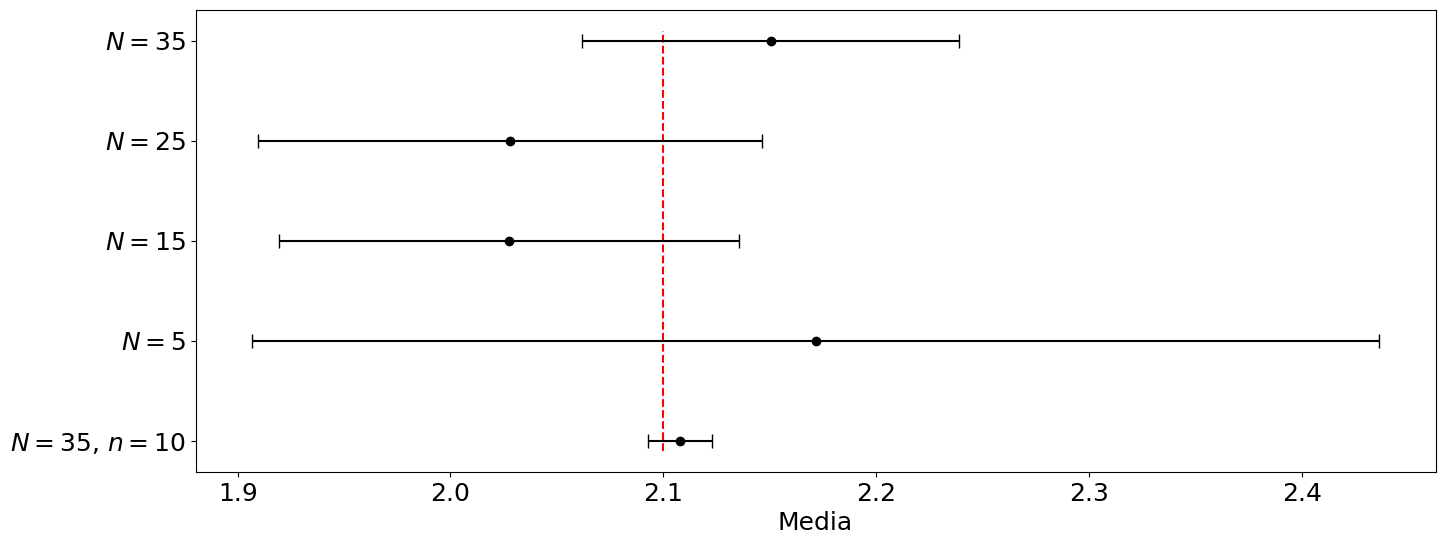

In [24]:
###################
media = 2.1    # media de la distribución original
desv = 0.5     # desviación estándar de la distribución 
semilla = 5    # semilla para el generador de valores aleatorios
N = 35         # Total de medidas por vez
n = 10         # Veces que se repite el total de medidas
##################


import numpy as np
import pylab as plt
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,figsize=(16,6))

def pdfUniform(media,desv):
    b = media + np.sqrt(12)*desv/2
    a = 2*media - b
    pdf = 1/(b-a)
    return a,b,pdf

# Intervalo de la distribución
a,b,pdfUni = pdfUniform(media,desv)
ax.vlines(media,-6,N+1,ls='--',color='r')
ax.set_xlabel('Media')

# Repetición del experimento n veces
np.random.seed(semilla)
newDist = []
for ii in range(n):
    newDist.append(np.mean(np.random.uniform(a,b,size=N)))

newDist_m = np.mean(newDist)
newDist_s = np.std(newDist,ddof=1)/np.sqrt(N)
ax.errorbar(newDist_m,-5,xerr=newDist_s,fmt='o',color='k')

print('Distribución original: media = {:.4f}, desv = {:.4f}'.format(media,desv))
print('Nueva distribución: {:.4f} +/- {:.4f}'.format(newDist_m,newDist_s))

# procedimiento práctico
np.random.seed(semilla)
for ii in range(5,N+1,10):
    vals = np.random.uniform(a,b,size=ii)
    Prac_m = np.mean(vals)
    Prac_s = np.std(vals,ddof=1)/np.sqrt(ii)
    print('Para {} datos: {:.4f} +/- {:.4f}'.format(ii,Prac_m,Prac_s))
    ax.errorbar(Prac_m,ii,xerr=Prac_s,fmt='o',color='k')

ax.set_yticks(range(-5,N+1,10),['$N = 35$, $n = 10$','$N = 5$','$N = 15$', '$N = 25$', '$N = 35$'])
#plt.savefig('imagenes/TLC-error.svg')
plt.show()

## Ejemplo 2 error estándar

Distribución original: media = 2.1000, desv = 0.5000


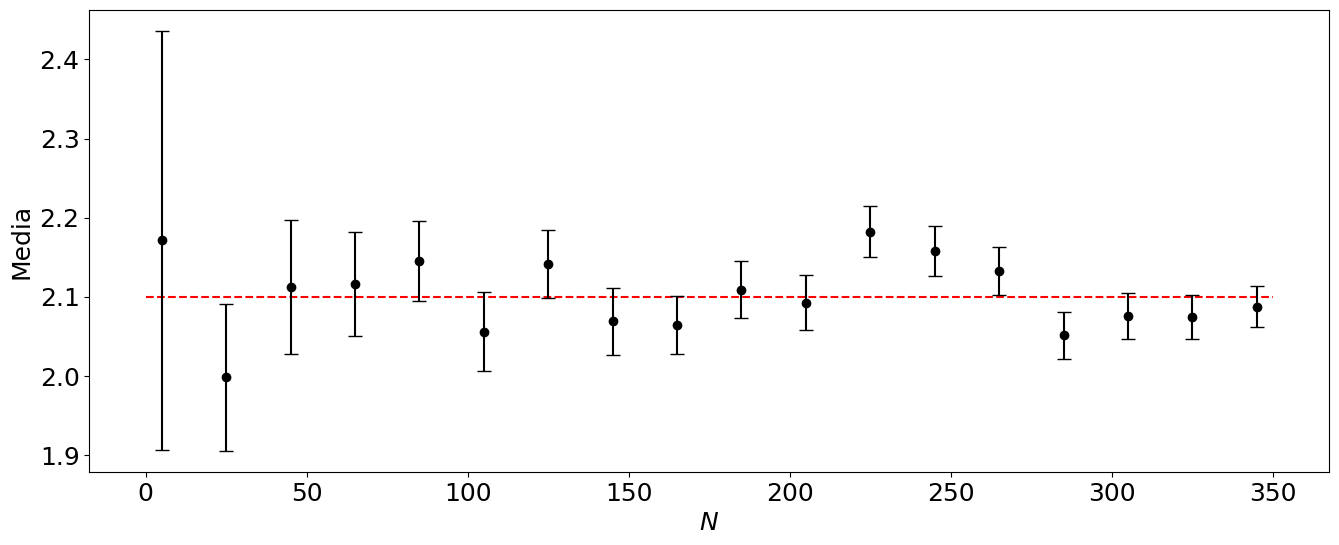

In [25]:
media = 2.1
desv = 0.5
semilla = 5
N = 350


import numpy as np
import pylab as plt
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,figsize=(16,6))

def pdfUniform(media,desv):
    b = media + np.sqrt(12)*desv/2
    a = 2*media - b
    pdf = 1/(b-a)
    return a,b,pdf

# Intervalo de la distribución
a,b,pdfUni = pdfUniform(media,desv)
ax.hlines(media,0,N,ls='--',color='r')
ax.set_xlabel('$N$')
ax.set_ylabel('Media')

print('Distribución original: media = {:.4f}, desv = {:.4f}'.format(media,desv))

# procedimiento práctico
np.random.seed(semilla)
Prac_m = []
Prac_s = []
for ii in range(5,N+1,20):
    vals = np.random.uniform(a,b,size=ii)
    Prac_m.append(np.mean(vals))
    Prac_s.append(np.std(vals,ddof=1)/np.sqrt(ii))
    
ax.errorbar(range(5,N+1,20),Prac_m,yerr=Prac_s,fmt='o',color='k')

#plt.savefig('imagenes/TLC-error2.svg')
plt.show()

## Ejemplo incertidumbre estándar

In [26]:
import numpy as np

def media(vals):
    return np.sum(vals)/len(vals)

def desvi(vals,m):
    return np.sqrt(np.sum((vals-m)**2)/(len(vals)-1))

g = 979.748
t = np.array([44,53,47,47,46,50,53])/100
t_mean = media(t)
print('t_mean',t_mean)
t_e = desvi(t,t_mean)
print('t_e',t_e)
t_f = t_e/np.sqrt(len(t))
print('t_f',t_f)

print(0.5*g*t_mean**2)
print(0.5*g*(t_mean+t_f)**2)
print(0.5*g*(t_mean-t_f)**2)

diff = abs(0.011-0.013)/0.013
print('diferencia con método rápido = {:.2f} %'.format(diff*100))

t_mean 0.48571428571428577
t_e 0.035050983275386575
t_f 0.013248026422136724
115.57027428571432
121.96069118993162
109.35181315292557
diferencia con método rápido = 15.38 %


## Intervalos de confianza de la Distribución normal

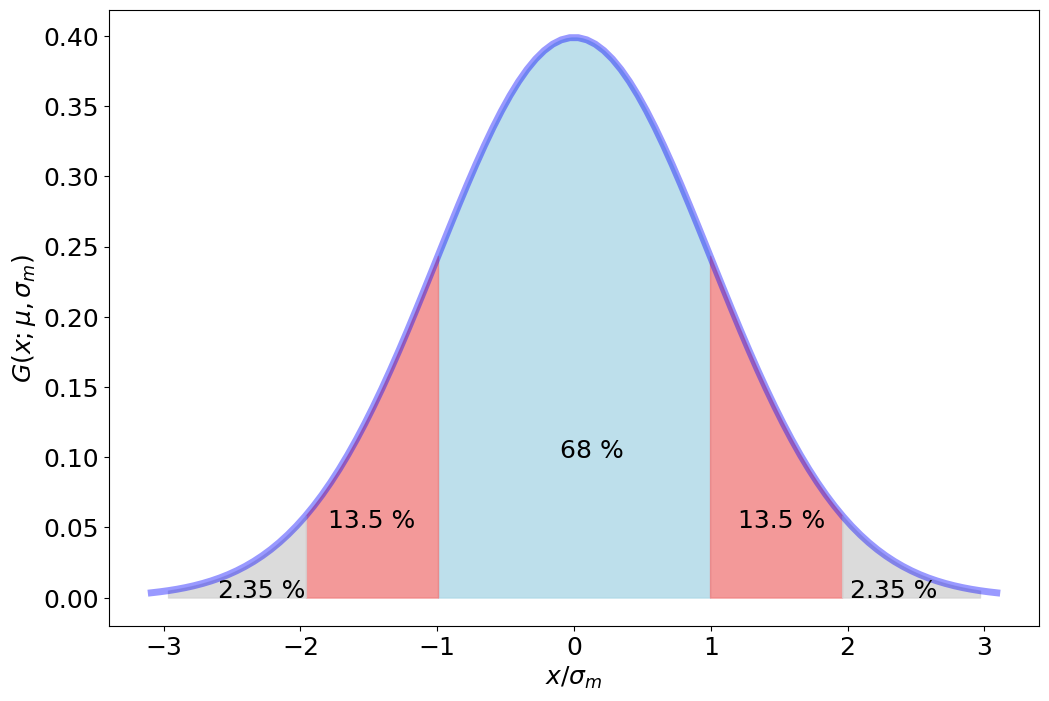

In [27]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1, 1,figsize=(12,8))
x = np.linspace(norm.ppf(0.001),
                norm.ppf(0.999), 100)
ax.plot(x, norm.pdf(x),
       'b-', lw=5, alpha=0.4, label='norm pdf')
x1 = np.linspace(norm.ppf(0.16),norm.ppf(0.84), 50)
ax.fill_between(x1,norm.pdf(x1),color='lightblue',alpha=0.8)
ax.text(-0.1,0.1,'68 %')
x2a = np.linspace(norm.ppf(0.025),norm.ppf(0.16), 50)
ax.fill_between(x2a,norm.pdf(x2a),color='lightcoral',alpha=0.8)
ax.text(-1.8,0.05,'13.5 %')
x2b = np.linspace(norm.ppf(0.84),norm.ppf(0.975), 50)
ax.fill_between(x2b,norm.pdf(x2b),color='lightcoral',alpha=0.8)
ax.text(1.2,0.05,'13.5 %')
x3a = np.linspace(norm.ppf(0.0015),norm.ppf(0.025), 50)
ax.fill_between(x3a,norm.pdf(x3a),color='lightgray',alpha=0.8)
ax.text(-2.6,0.0,'2.35 %')
x3b = np.linspace(norm.ppf(0.975),norm.ppf(0.9985), 50)
ax.fill_between(x3b,norm.pdf(x3b),color='lightgray',alpha=0.8)
ax.text(2.02,0.0,'2.35 %')
ax.set_xlabel('$x/\sigma_m$')
ax.set_ylabel('$G(x;\mu,\sigma_m)$')
plt.savefig('imagenes/confianzaNormal.svg')
plt.show()

## Ejemplo error en el error

In [28]:
#### Altura y tiempo esperado ####
H = 121.6         # Altura cm
He = 0.1          # Incertidumbre altura cm
g = 979.748       # Aceleración de la gravedad cm/s^2
erelativo = 0.1   # Incertidumbre relativa en la medida del tiempo en s
N = 1000           # Número de medidas
############################
import numpy as np

def eerror(N):
    return 1/np.sqrt(2*N-2)

t = np.sqrt(2*H/g)
te = 0.5*t*He/H
print('Tiempo real = {} s +/- {} s'.format(t,te))

np.random.seed(0)
vals = []
for ii in range(N):
    vals.append(np.random.normal(loc=t,scale=t*erelativo))

desv = np.std(vals,ddof=1)/np.sqrt(N)
fracerror = eerror(N)
    
print('Media = {} s'.format(np.mean(vals)))
print('Incertidumbre = {} s'.format(desv))
print('Error Incertidumbre = {} %'.format(100*fracerror))
print('Rango Incertidumbre = [{}, {}] s'.format(desv*(1-fracerror),desv*(1+fracerror)))

import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1,1,figsize=(8,1))

data = np.copy(vals)
eje = np.zeros(len(data))
ax1.fill_between([t-te,t+te],0.01)
ax1.plot(data,eje,'r|',ms=10)
ax1.set(yticklabels=[])  # remove the tick labels
ax1.tick_params(left=False)  # remove the ticks
ax1.set_xlabel('t/s',fontsize=18)
ax1.set_xlim(0.3,0.7)
#ax1.set_ylim(-1,1)

# use set_position
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')

plt.show()

Tiempo real = 0.49822394074410414 s +/- 0.0002048618177401744 s
Media = 0.49596914322901725 s
Incertidumbre = 0.001555871018204978 s
Error Incertidumbre = 2.2371868507134143 %
Rango Incertidumbre = [0.0015210632763716354, 0.0015906787600383206] s


## Reporte cifras incertidumbre

In [29]:
import numpy as np
import pylab as plt

def Perror(ent,err):
    return 100*abs(ent-err)/err

ent = 0.2
e= 0.15
print('El porcentaje de error es {:.2f} %'.format(Perror(ent,e)))

El porcentaje de error es 33.33 %


## Propagación de la incertidumbre

In [30]:
import numpy as np
import pylab as plt
from matplotlib import ticker
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(3, 2,figsize=(20,18))

# Definición de funciones
def flineal(x,a): # Lineal
    return 20*a*x

def fraiz(x,a): # no-lineal asimétrica
    return np.sqrt(a+ x)

def fcuadrada(x,a): #nolineal simétrica
    return (x+a)**2

n = 200
a = 0.1
dx1 = 0.1
dx2 = 0.01
x1 = np.linspace(-dx1,dx1,n)
axs[0,0].plot(x1/dx1,flineal(x1,a),'k')
axs[1,0].plot(x1/dx1,fraiz(x1,a),'k')
axs[2,0].plot(x1/dx1,fcuadrada(x1,a),'k')
x2 = np.linspace(-dx2,dx2,n)
axs[0,1].plot(x2/dx2,flineal(x2,a),'k')
axs[1,1].plot(x2/dx2,fraiz(x2,a),'k')
axs[2,1].plot(x2/dx2,fcuadrada(x2,a),'k')
axs[0,1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))


for ax in axs.flat:
    ax.set(xlabel=r'$x/\Delta_x$', ylabel='f(x)')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    ax.grid()

plt.savefig('imagenes/propaError.svg')
plt.show()

## Propagación de incertidumbre: cotas diferentes

In [31]:
## Valores para cotas diferentes eL = 0.05 y em = 0.2
## Valores para cotas iguales eL = 0.03 y em = 0.1


import numpy as np
L = 1.20 # cm
eL = 0.05
Ls = np.array([L-eL,L+eL])
m = 50.0 # gramos
em = 0.2
ms = np.array([m-em,m+em])
rho = m/L**3

# todas las posibilidades
rhos = []
for l1 in Ls:
    for m1 in ms:
            auxrho = m1/l1**3
            rhos.append(auxrho)
print('Todas las posibilidades en g/cm^3')
print(rhos)
print('Densidad máxima {} y densidad mínima \
      {}'.format(np.max(rhos),np.min(rhos)))
print('Incertidumbre "max" = {} y "min" {}'.format(abs(np.max(rhos)-rho),abs(np.min(rhos)-rho)))


print('\nCon valores extremos:')
rhoM = (m+em)/(L+eL)**3
rhom = (m-em)/(L-eL)**3
print('Densidad máxima {} y densidad mínima \
      {}'.format(rhoM,rhom))
print('Incertidumbre "max" = {} y "min" {}'.format(abs(rhoM-rho),abs(rhom-rho)))

errpro = abs(rhoM -rhom)/2
print('\nIncertidumbre promedio = {}'.format(errpro))

print('#Diferencia porcentual')
difmin = abs(np.min(rhos)-rhoM)/rhoM*100
difmax = abs(np.max(rhos)-rhom)/rhom*100
print('Dif máximos {} y dif mínimos \
      {}'.format(difmax,difmin))

print('\nUsando la propagación de errores:')
erho2rel = (em/m)**2 + 9*(eL/L)**2
erho = rho*np.sqrt(erho2rel)
print('Incertidumbre = {}'.format(erho))
print('Densidad máxima {} y densidad mínima \
      {}'.format(rho+erho,rho-erho))




## Usando método aproximación funcional de Lyons o Hughes and Hase
Fmax2 = ((m+em)/(L)**3 - rho)**2 + ((m)/(L+eL)**3 - rho)**2
Fmin2 = ((m-em)/(L)**3 - rho)**2 + ((m)/(L-eL)**3 - rho)**2

print('\nUsando aproximación funcional:')
print('Densidad máxima {} y densidad mínima \
      {}'.format(np.sqrt(Fmax2),np.sqrt(Fmin2)))

print('\nValor rho = {} g/cm^3'.format(rho))

Fmax2

Todas las posibilidades en g/cm^3
[32.744308375113015, 33.007314868085814, 25.4976, 25.7024]
Densidad máxima 33.007314868085814 y densidad mínima       25.4976
Incertidumbre "max" = 4.0721296829006235 y "min" 3.437585185185192

Con valores extremos:
Densidad máxima 25.7024 y densidad mínima       32.744308375113015
Incertidumbre "max" = 3.2327851851851896 y "min" 3.809123189927824

Incertidumbre promedio = 3.520954187556507
#Diferencia porcentual
Dif máximos 0.8032128514056347 y dif mínimos       0.7968127490039931

Usando la propagación de errores:
Incertidumbre = 3.618749526168498
Densidad máxima 32.55393471135369 y densidad mínima       25.316435659016694

Usando aproximación funcional:
Densidad máxima 3.33719285306468 y densidad mínima       3.942325789484407

Valor rho = 28.93518518518519 g/cm^3


11.13685613854598

## Valor resistencia

Fabricante 5 %: R = (100.0 +/- 5.0) Ohm
Baku: R = (96.01 +/- 0.14) Ohm
Baku F: R = (96.50 +/- (0.96 + 2.00)) Ohm
Mastech: R = (98.90 +/- 0.10) Ohm
Mastech F: R = (98.90 +/- (0.79+0.30)) Ohm


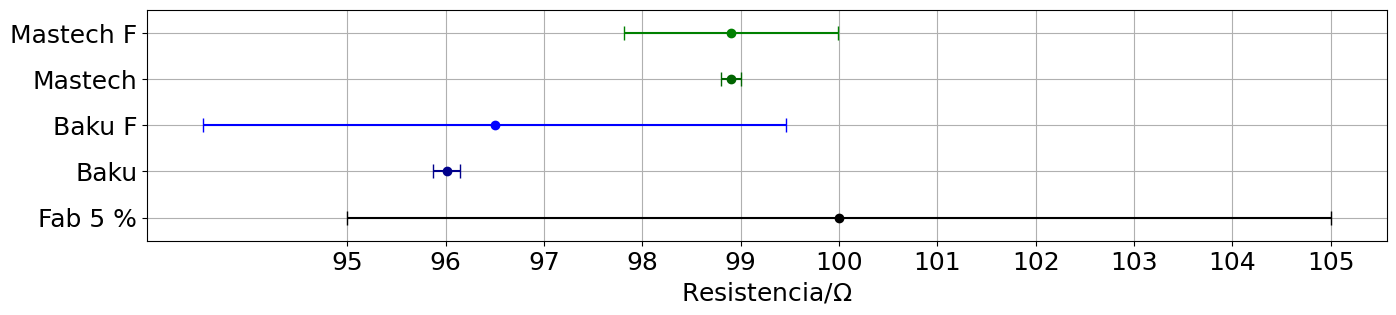

Compara "Baku" y "Mastech": z = 16.76
Compara "Baku" y "Mastech F": z = 3.60


In [32]:
import numpy as np
import pylab as plt
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,figsize=(16,3))

# R fabricante 5% en Ohm
R = 100.0
eR = R*0.05
print(r'Fabricante 5 %: R = ({} +/- {}) Ohm'.format(R,eR))
ax.errorbar(R,1,xerr=eR,fmt='o',color='k')

# R multímetro Baku, escala 200 Ohm, precisión de 1 % + 2 dígitos
Rbs = [96.5,96.0,96.0,96.2,96.1,96.6,96.3,96.0,96.2,96.1,95.0,95.1]
Rb = np.mean(Rbs)
eRb = np.std(Rbs,ddof=1)/np.sqrt(len(Rbs))
print(r'Baku: R = ({:.2f} +/- {:.2f}) Ohm'.format(Rb,eRb))
ax.errorbar(Rb,2,xerr=eRb,fmt='o',color='darkblue')

# Usando la precisión dada por el fabricante
Rb2 = Rbs[0]
eRb2 = Rbs[0]*0.01
print(r'Baku F: R = ({:.2f} +/- ({:.2f} + {:.2f})) Ohm'.format(Rb2,eRb2,2))
ax.errorbar(Rb2,3,xerr=eRb2+2,fmt='o',color='blue')

# multímetro Mastech, escala 200 Ohm, precisión 0.8 % + 3 digitos
# Más de la mitad de las 10 mediciones dieron 98.9 Ohm, por lo que no tiene sentido determinar el error estándar.
# Se toma la resolución del instrumento como la mitad de la incertidumbre de la medida
Rm = 98.9
eRm = 0.1
print(r'Mastech: R = ({:.2f} +/- {:.2f}) Ohm'.format(Rm,eRm))
ax.errorbar(Rm,4,xerr=eRm,fmt='o',color='darkgreen')

Rm2 = 98.9
eRm2 = Rm2*0.008
print(r'Mastech F: R = ({:.2f} +/- ({:.2f}+{:.2f})) Ohm'.format(Rm2,eRm2,0.3))
ax.errorbar(Rm2,5,xerr=eRm2+0.3,fmt='o',color='green')

ax.set_yticks(range(1,5+1,1),['Fab 5 %', 'Baku','Baku F','Mastech','Mastech F'])
ax.set_xticks(np.arange(95,106))
ax.set_ylim(0.5,5.5)
ax.set_xlabel(r'Resistencia/$\Omega$')
plt.grid()

#plt.savefig('imagenes/resistencia.svg')
plt.show()

def zcompa(x,ex,y,ey):
    return abs(x-y)/np.sqrt(ex**2+ey**2)

print('Compara "Baku" y "Mastech": z = {:.2f}'.format(zcompa(Rb,eRb,Rm,eRm)))
print('Compara "Baku" y "Mastech F": z = {:.2f}'.format(zcompa(Rb,eRb,Rm2,eRm2)))

## Incertidumbre común e incertidumbre no uniforme


ex = [2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4.]


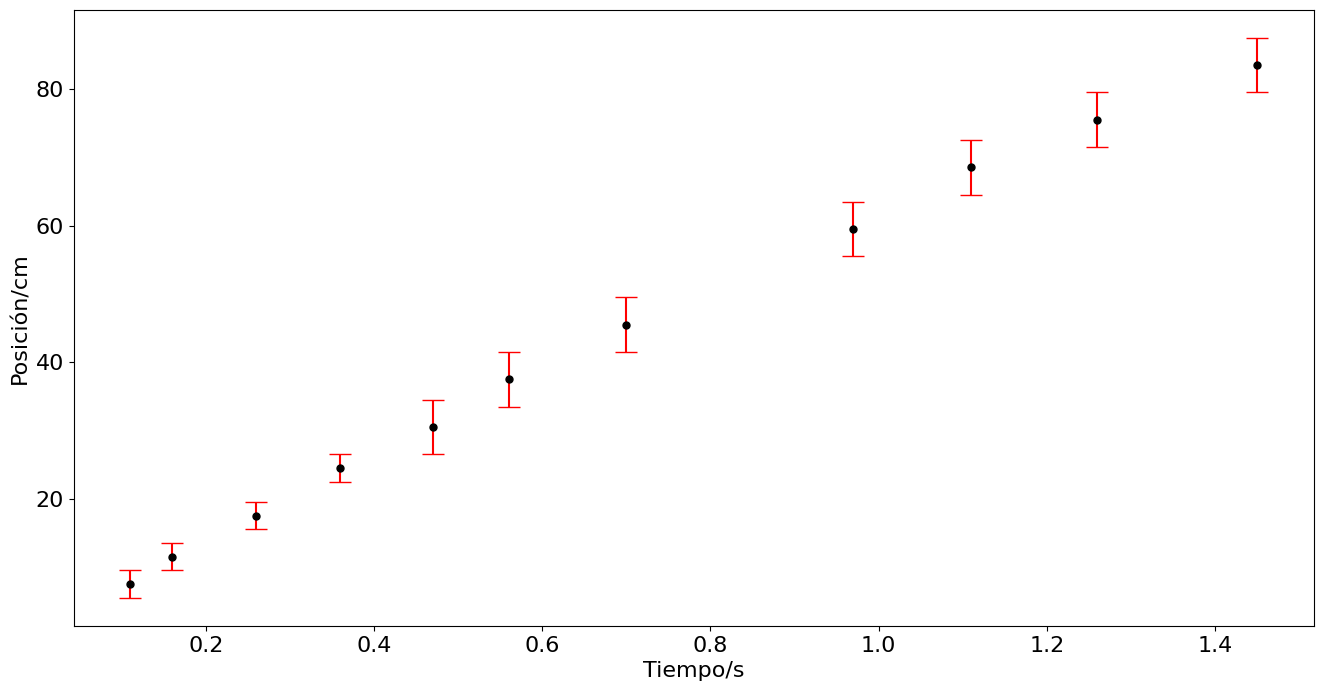

In [33]:
import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 16})
# Datos tiempo y posición

t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
print('ex = {}'.format(ex))

plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
#plt.savefig('../docs/part3/imagenes/bola2.png',format='png')
plt.show()

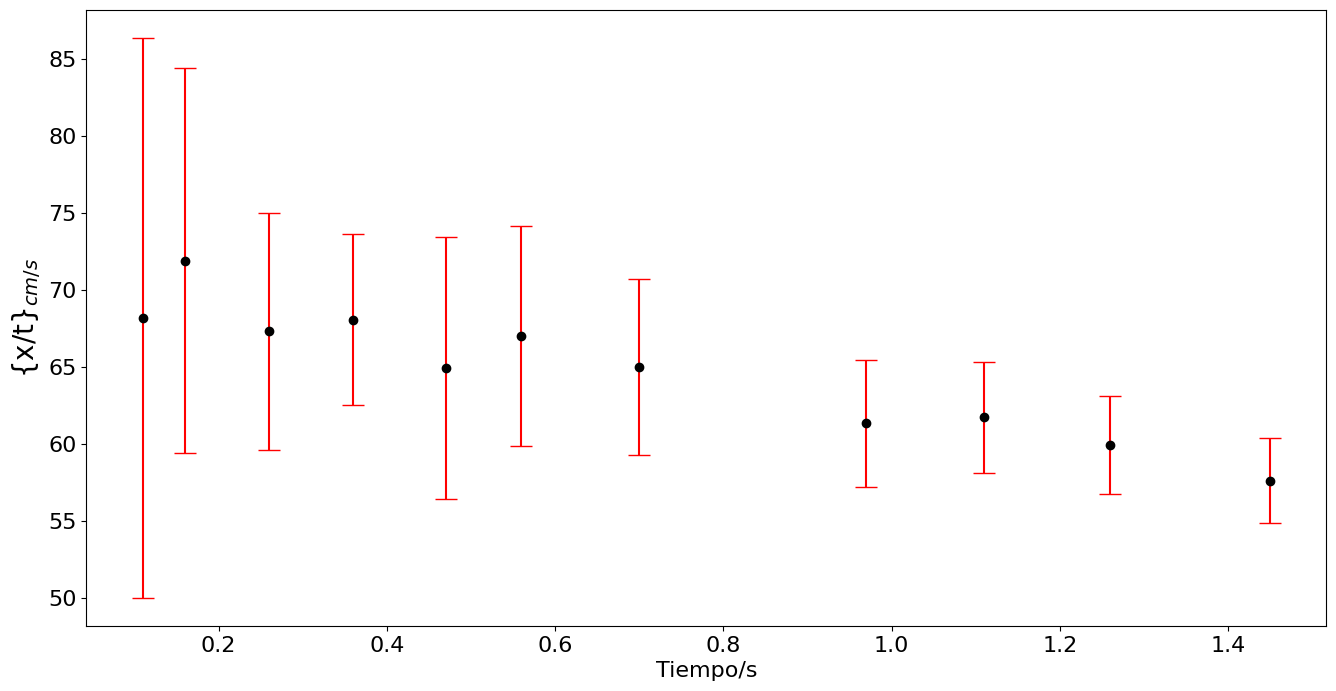

[18.18181818 12.5         7.69230769  5.55555556  8.5106383   7.14285714
  5.71428571  4.12371134  3.6036036   3.17460317  2.75862069]


In [34]:
# Linearización suponiendo que sigue la forma x -x0 = v0t -at^2

xnt = (x)/t
exnt = ex/t

plt.figure(figsize=(16,8))
plt.errorbar(t,xnt,yerr=exnt,fmt='.',ms=12,capsize=8,ecolor='r',color='k')
plt.ylabel('{x/t}$_{cm/s}$',fontsize=20)
plt.xlabel('Tiempo/s')
#plt.savefig('../docs/part3/imagenes/bola3.png',format='png')
plt.show()
print(exnt)

Incertidumbre con CU
pendiente = -8.772415597184395 +/- 0.927183470438874
intercepto = 70.7127570972936 +/- 0.746080290006485
Incertidumbre común = 1.3534511430148493

Incertidumbre con pesos w
pendiente = -9.005693891835685 +/- 3.7044534511938685
intercepto = 70.95772216034942 +/- 4.149371558965397


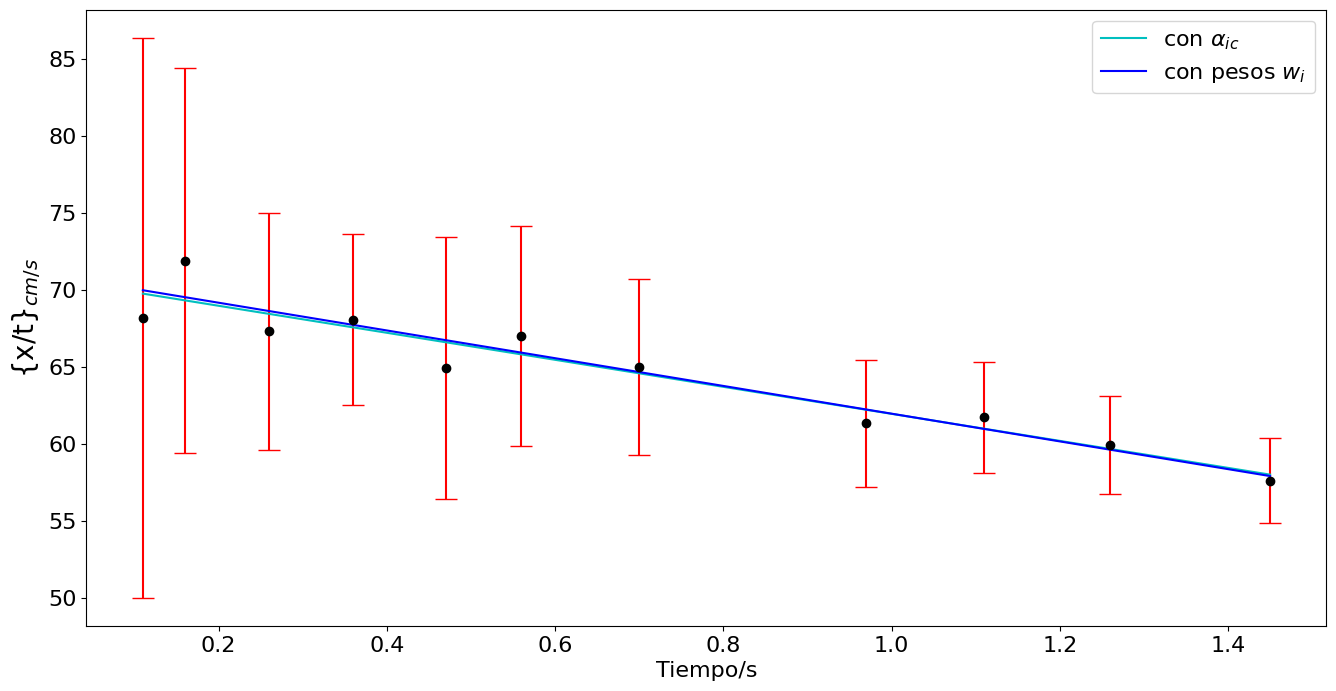

In [35]:
## Mínimos cuadrados sin considerar la incertidumbre de la variable dependiente
N = len(t)
Sumax = np.sum(t)
Sumay = np.sum(xnt)
Sumax2 = np.sum(t**2)
Sumaxy = np.sum(t*xnt)
Delta = N*Sumax2-Sumax**2
c = (Sumax2*Sumay - Sumax*Sumaxy)/Delta
m = (N*Sumaxy - Sumax*Sumay)/Delta
eCU = np.sqrt((1/(N-2))*np.sum((xnt-m*t-c)**2))
ec = eCU*np.sqrt(Sumax2/Delta)
em = eCU*np.sqrt(N/Delta)

print('Incertidumbre con CU')
print('pendiente = {} +/- {}'.format(m,em))
print('intercepto = {} +/- {}'.format(c,ec))
print('Incertidumbre común = {}'.format(eCU))

plt.figure(figsize=(16,8))
plt.errorbar(t,xnt,yerr=exnt,fmt='.',ms= 12,capsize=8,ecolor='r',color='k')
plt.plot(t,c + m*t,'c-',label=r'con $\alpha_{ic}$')
plt.ylabel('{x/t}$_{cm/s}$',fontsize=20)
plt.xlabel('Tiempo/s')

# Mínimos cuadrados considerando la incetidumbre de la variable dependiente
w = 1/exnt**2
sumaw = np.sum(w)
Sumax = np.sum(w*t)
Sumay = np.sum(w*xnt)
Sumax2 = np.sum(w*t**2)
Sumaxy = np.sum(w*t*xnt)
Delta = sumaw*Sumax2-Sumax**2
c = (Sumax2*Sumay - Sumax*Sumaxy)/Delta
m = (sumaw*Sumaxy - Sumax*Sumay)/Delta
ec = np.sqrt(Sumax2/Delta)
em = np.sqrt(sumaw/Delta)

print('\nIncertidumbre con pesos w')
print('pendiente = {} +/- {}'.format(m,em))
print('intercepto = {} +/- {}'.format(c,ec))


plt.plot(t,c + m*t,'b-',label=r'con pesos $w_i$')
plt.legend()
plt.savefig('../docs/part7/imagenes/bola5.png',format='png')
plt.show()

## Ajuste nolineal

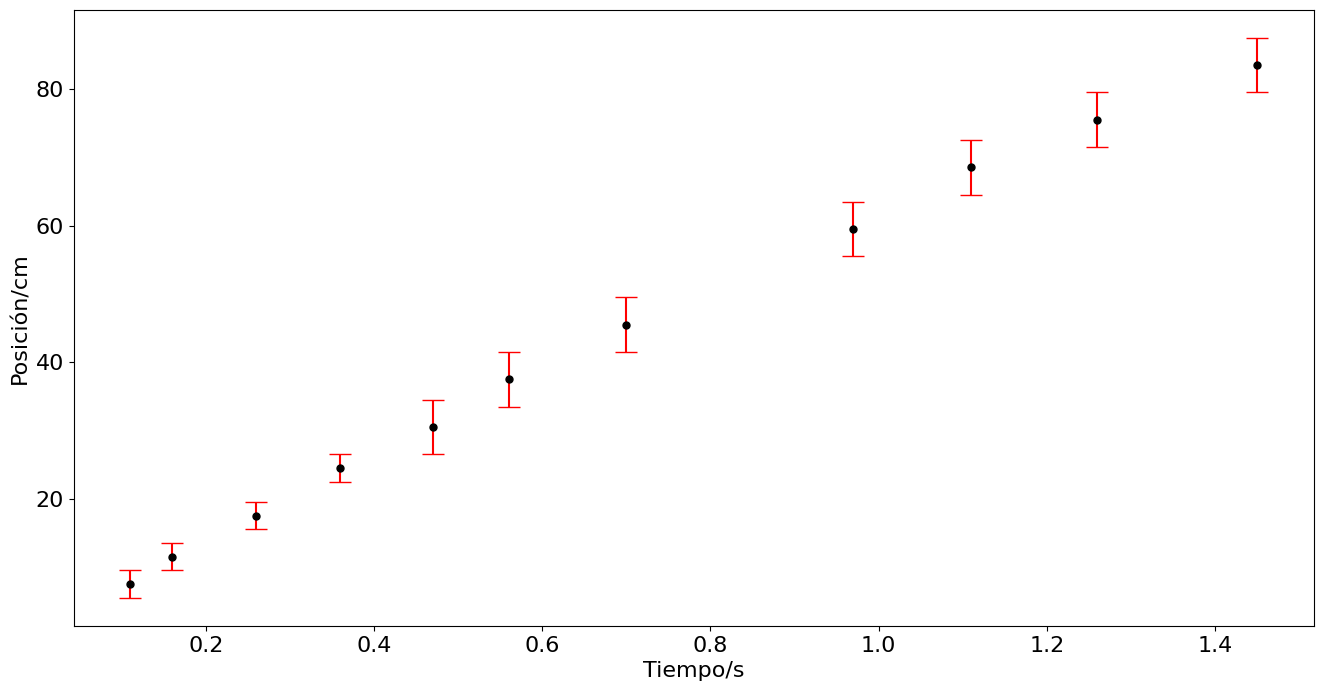

In [36]:
import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 16})

# Datos tiempo y posición
t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
#print('ex = {}'.format(ex))

#Graficación
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.savefig('../docs/part7/imagenes/bola6a.png',format='png')
plt.show()

popt [70.95772217 -9.0056939 ] 
error [0.70664679 0.6308763 ]


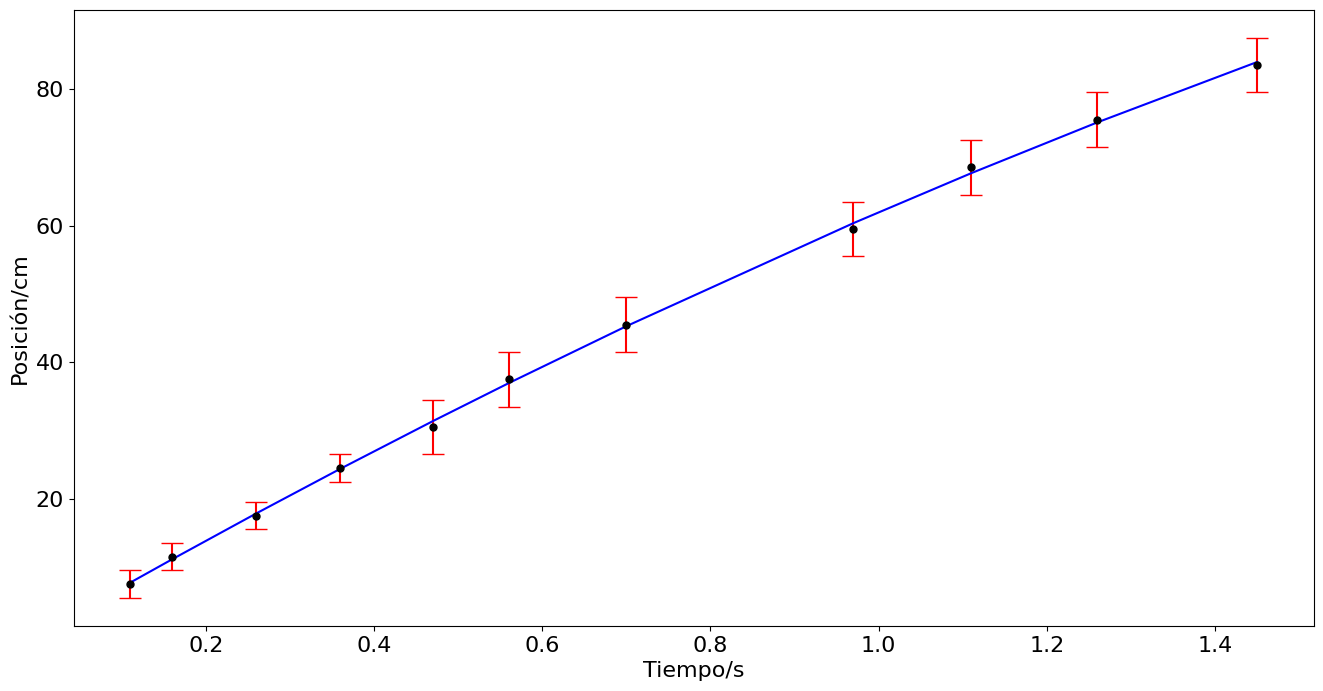

In [37]:
# Se importa la función curve_fit
from scipy.optimize import curve_fit

# Se define la función del modelo nolineal
def desacelerar(t,v0,a):
    return  v0*t + a*t**2

# Se ejecuta curve_fit y se determinan las incertidumbres de los parámetros. Se imprimem en pantalla
popt,pcov = curve_fit(desacelerar,t,x,sigma=ex)
error = np.sqrt(np.diag(pcov))
print('popt',popt,'\nerror',error)

# Se construye una nueva gráfica incluyendo el ajuste
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.plot(t,desacelerar(t,*popt),'b')
plt.savefig('../docs/part7/imagenes/bola6.png',format='png')
plt.show()

## Interpolación

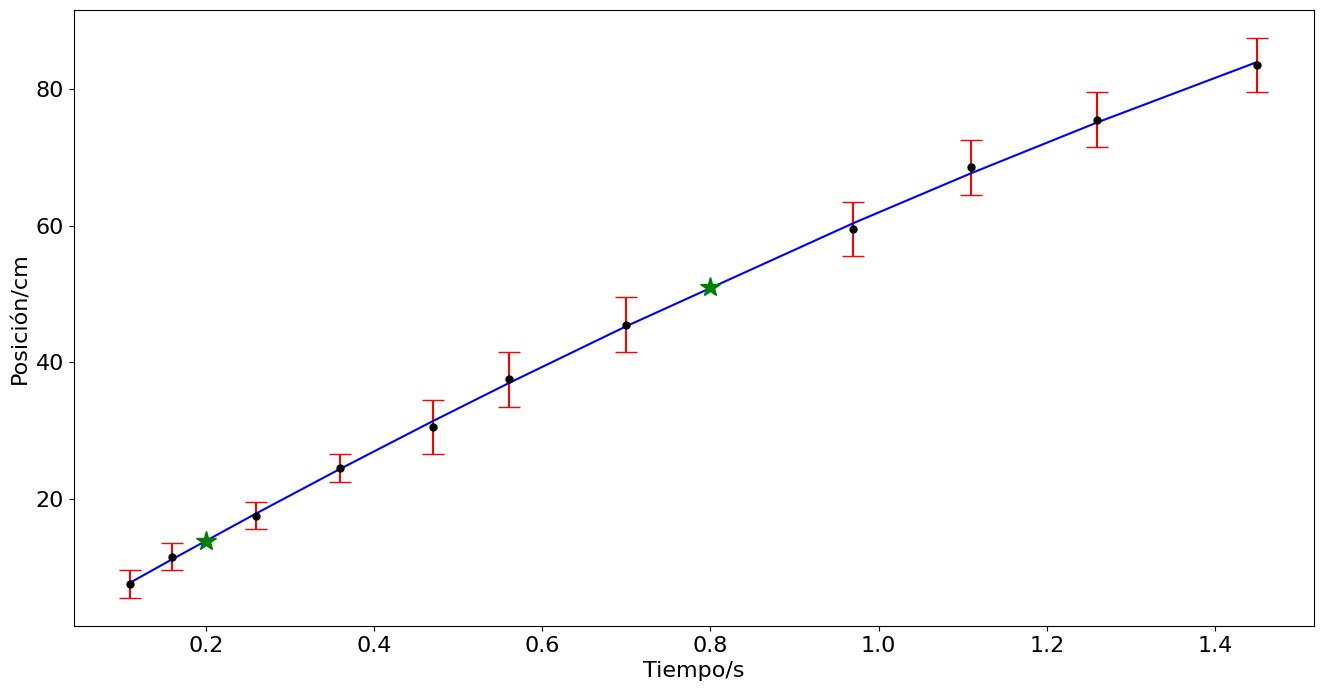

In [38]:
t_int = np.array([0.2,0.8])

# Se construye una nueva gráfica incluyendo el ajuste
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.plot(t,desacelerar(t,*popt),'b')
plt.plot(t_int,desacelerar(t_int,*popt),color='green',lw=0,marker='*',ms=15)
#plt.savefig('../docs/part7/imagenes/bola6b.png',format='png')
plt.show()

## Extrapolación

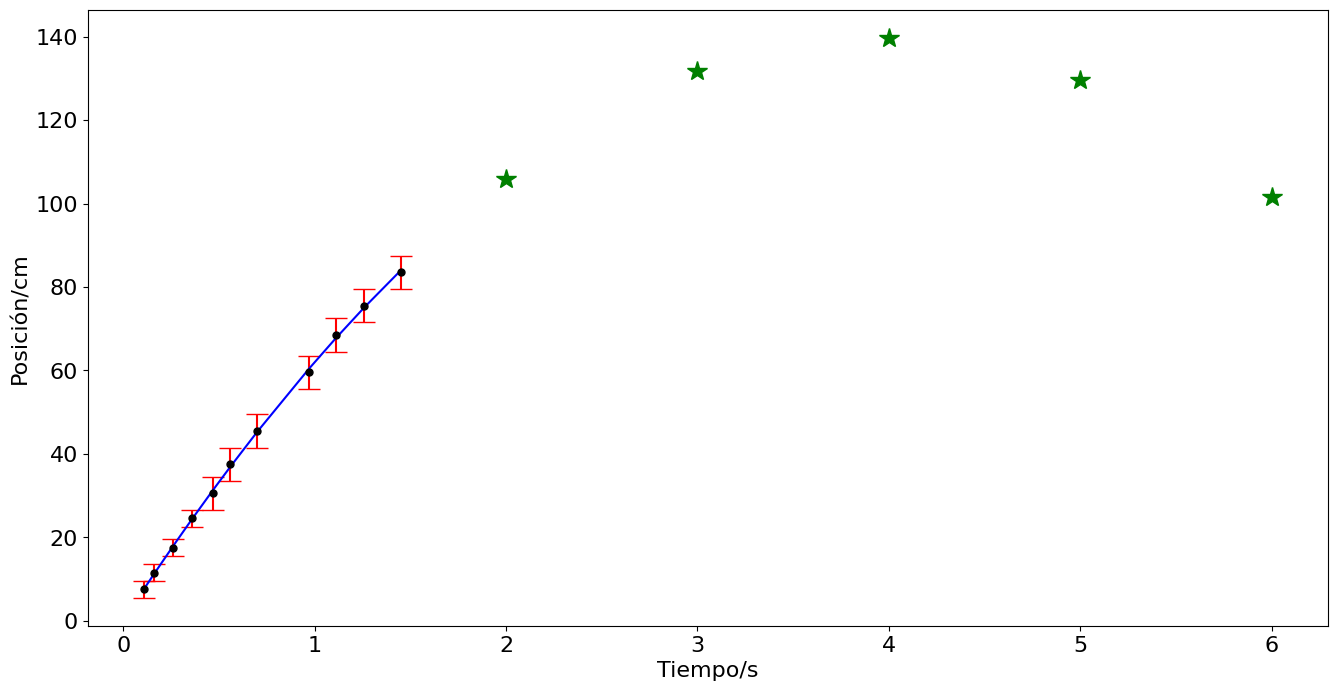

In [39]:
t_int = np.array([2,3,4,5,6])

# Se construye una nueva gráfica incluyendo el ajuste
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.plot(t,desacelerar(t,*popt),'b')
plt.plot(t_int,desacelerar(t_int,*popt),color='green',lw=0,marker='*',ms=15)
#plt.savefig('../docs/part7/imagenes/bola6c.png',format='png')
plt.show()

## Aliasing

[ -0.26803538   9.55104563 -20.06043225  14.20920494  -4.08963929
   0.41138829] [0.25329025 1.3703176  2.24793239 1.48210066 0.42100325 0.04295575]


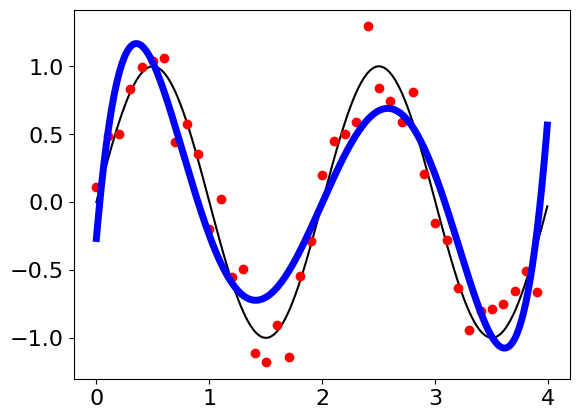

In [40]:
import numpy as np
import pylab as plt
from scipy.optimize import curve_fit

t = np.arange(0,4,0.01)

T0 = 2.0
t0 = 0.0

def armonico(t,T0,t0):
     return np.sin(2*np.pi*(t-t0)/T0)
    
def poli(t,a,b,c,d,e,f):
    return a + b*t + c*t**2 + d*t**3 + e*t**4 + f*t**5
    

texp = np.arange(0,4,0.1)
fexp = armonico(texp,T0,t0) + np.random.normal(0,0.2,len(texp))
popt,pcov = curve_fit(poli,texp,fexp)
print(popt,np.sqrt(np.diag(pcov)))

plt.figure()
plt.plot(t,armonico(t,T0,t0),'k-')
plt.plot(texp,fexp,lw=0,color='red',marker='.',ms=12)
plt.plot(t,poli(t,*popt),'b-',lw=5)

[0.287727] [0.03653122]


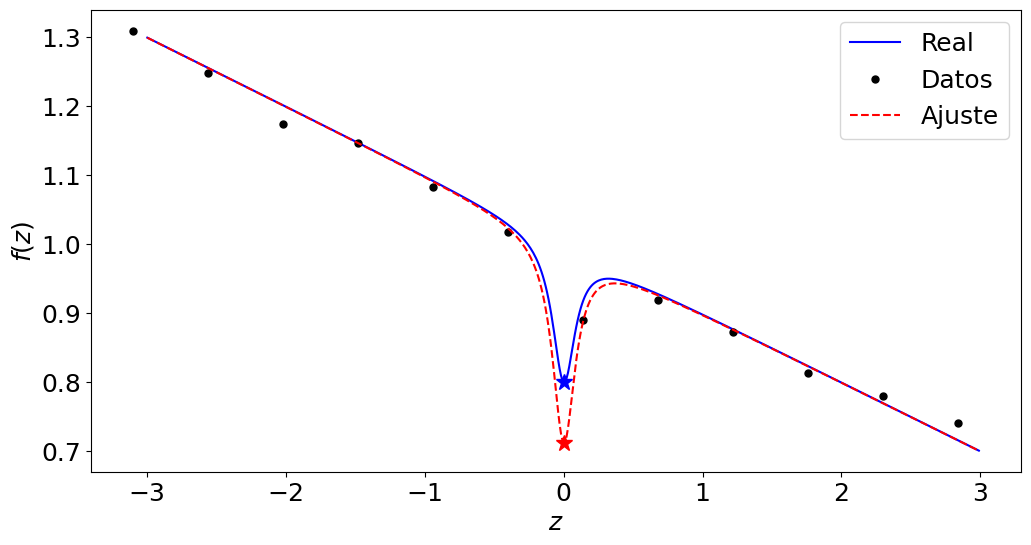

In [41]:
import numpy as np
import pylab as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 18})
np.random.seed(9)

z = np.arange(-3,3,0.01)

def fenomeno(z,beta):
    z0 = 0.1
    return 1 - beta/(1+(z/z0)**2) - 0.1*z

beta = 0.2
zexp = np.arange(-3.1,3,0.54)
fexp = fenomeno(zexp,beta)*(1+np.random.normal(0,0.02,len(zexp)))

popt,pcov = curve_fit(fenomeno,zexp,fexp)
print(popt,np.sqrt(np.diag(pcov)))

plt.figure(figsize=(12,6))
plt.plot(z,fenomeno(z,beta),'b',label='Real')
plt.plot(zexp,fexp,lw=0,marker='.',color='k',ms=10,label='Datos')
plt.plot(z,fenomeno(z,*popt),'r--',label='Ajuste')
plt.plot(0,fenomeno(0,beta),'b*',ms=12)
plt.plot(0,fenomeno(0,*popt),'r*',ms=12)
plt.xlabel('$z$')
plt.ylabel('$f(z)$')
plt.legend()
#plt.savefig('../docs/part7/imagenes/interpola.svg',format='svg')
plt.show()

## Criterio Chauvenet

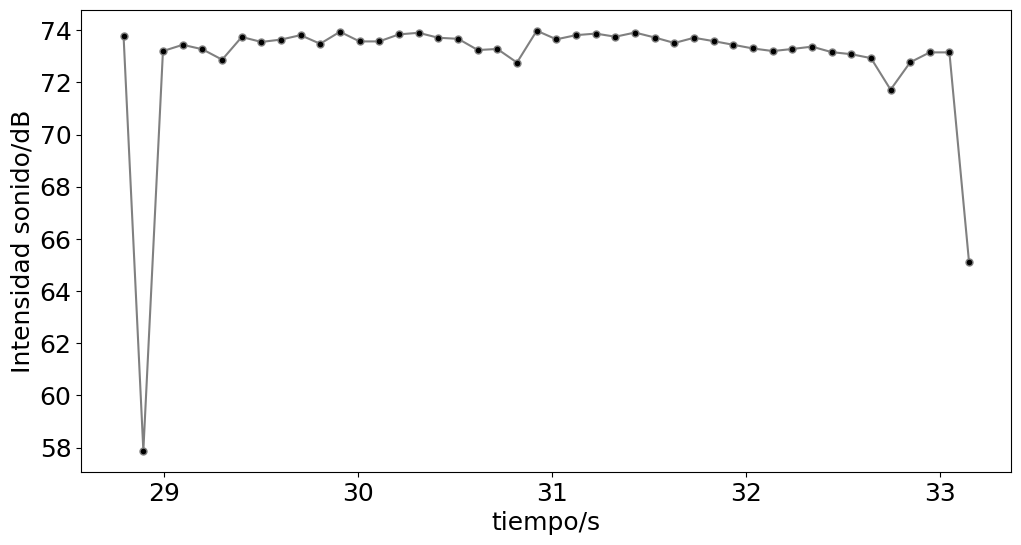

media = 72.89340909090909 dB y desv = 2.6659602250926207 dB
Total datos = 44


In [42]:
# Señal de sonido #

import numpy as np
import pylab as plt
plt.rcParams.update({'font.size':18})


#datos = np.loadtxt('datos/B_casa.csv',delimiter=',',skiprows=1)
datos = np.loadtxt('audios/sonido-afeitadora.csv',delimiter=',',skiprows=1)
fig,ax = plt.subplots(1,figsize=(12,6))
min=284
max=328
datosX = datos[min:max,0]
datosY = datos[min:max,1]

ax.plot(datosX,datosY,color='gray',marker='.',ms='10',markerfacecolor='k')
ax.set_xlabel('tiempo/s')
ax.set_ylabel('Intensidad sonido/dB')
#plt.savefig('imagenes/sonido-afeitadora.svg')
plt.show()

# valor esperado y desviación estándar
media = np.mean(datosY)
desv = np.std(datosY,ddof=1)
print('media = {} dB y desv = {} dB'.format(media,desv))
print('Total datos = {}'.format(len(datosX)))

ubica [1, 43] valor [57.88, 65.12] tiempo [28.893, 33.147] proba [1.7862795954416575e-08, 0.003547768771250433] valC [7.859630219943293e-07, 0.15610182593501906]
El valor 57.88 fue eliminado porque valC = 7.859630219943293e-07
El valor 65.12 fue eliminado porque valC = 0.15610182593501906


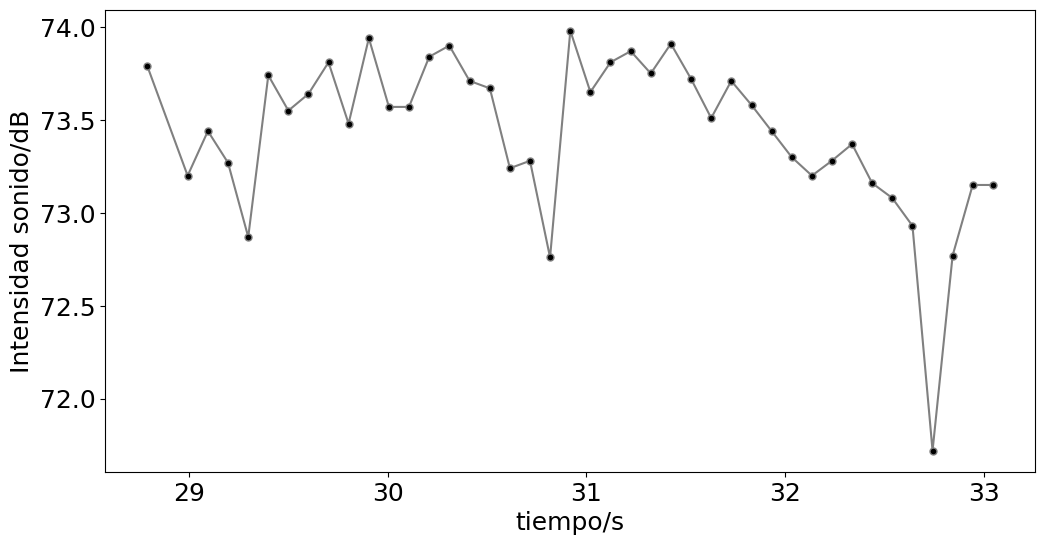

media = 73.43595238095239 dB y desv = 0.4255444691663788 dB
Total datos = 42


In [43]:
from scipy.stats import norm

criterio = 2.5
dataB = np.copy(datosY)
datat = np.copy(datosX)

media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
disper = abs(dataB-media)
ubica = []
valor = []
valC = []
tiempo = []
proba = []
for ii in range(len(disper)):
    if(np.max(disper[ii])>criterio*desv):
        ubica.append(ii)
        valor.append(dataB[ii])
        tiempo.append(datat[ii])
        prob = 2*norm.sf(media + abs(dataB[ii]-media),loc=media,scale=desv)
        proba.append(prob)
        valC.append(len(dataB)*prob)
print('ubica',ubica,'valor',valor,'tiempo',tiempo,'proba',proba,'valC',valC)

ubica = np.asarray(ubica)
for ii in range(len(valC)):
    if(valC[ii] < 0.5):
        dataB = np.delete(dataB,ubica[ii])
        datat = np.delete(datat,ubica[ii])
        ubica = ubica - 1
        print('El valor {} fue eliminado porque valC = {}'.format(valor[ii],valC[ii]))

media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
fig,ax = plt.subplots(1,figsize=(12,6))
ax.plot(datat,dataB,color='gray',marker='.',ms='10',markerfacecolor='k')
ax.set_xlabel('tiempo/s')
ax.set_ylabel('Intensidad sonido/dB')
#plt.savefig('imagenes/sonido-chauvenet.svg')
plt.show()    

# valor esperado y desviación estándar
media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
print('media = {} dB y desv = {} dB'.format(media,desv))
print('Total datos = {}'.format(len(dataB)))

### Señal de campo magnético

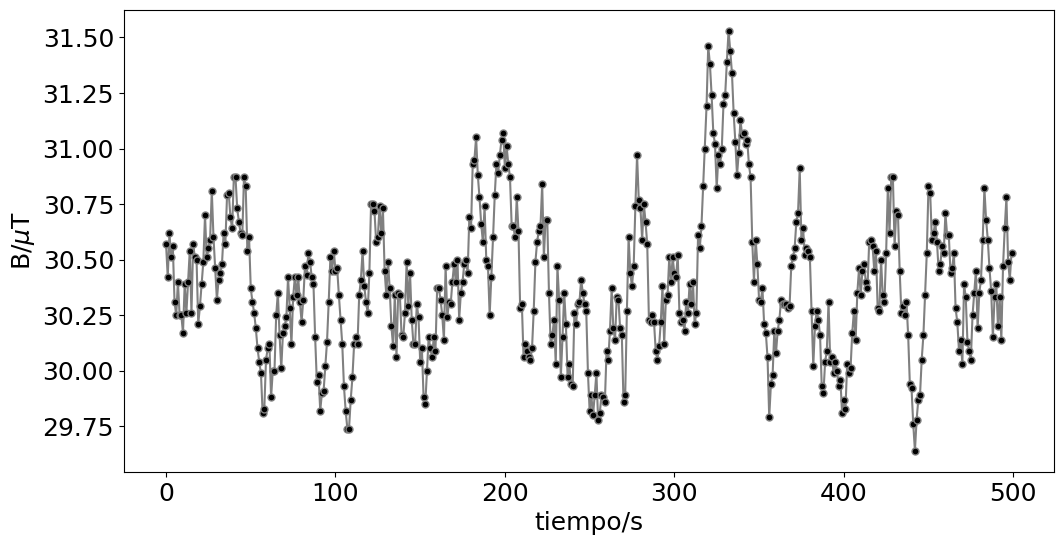

media = 30.38782 uT y desv = 0.32608297688722 uT
Total datos = 500


In [44]:
# Señal de sonido #

import numpy as np
import pylab as plt
plt.rcParams.update({'font.size':18})


datos = np.loadtxt('datos/B_casa.csv',delimiter=',',skiprows=1)
fig,ax = plt.subplots(1,figsize=(12,6))
min=0
max=len(datos[:,4])
max=500
datosX = datos[min:max,0]
datosY = datos[min:max,4]

ax.plot(datosY,color='gray',marker='.',ms='10',markerfacecolor='k')
ax.set_xlabel('tiempo/s')
ax.set_ylabel('B/$\mu$T')
#plt.savefig('imagenes/campoB.svg')
plt.show()

# valor esperado y desviación estándar
media = np.mean(datosY)
desv = np.std(datosY,ddof=1)
print('media = {} uT y desv = {} uT'.format(media,desv))
print('Total datos = {}'.format(len(datosX)))

500
donde 332 val 31.53
prob 0.00046051932502329636
valC 0.23025966251164817
499
donde 320 val 31.46
prob 0.0008588743722896175
valC 0.4285783117725191
498
donde 331 val 31.44
prob 0.0009274090019942763
valC 0.4618496829931496
497
donde 330 val 31.39
prob 0.001403406054770476
valC 0.6974928092209266


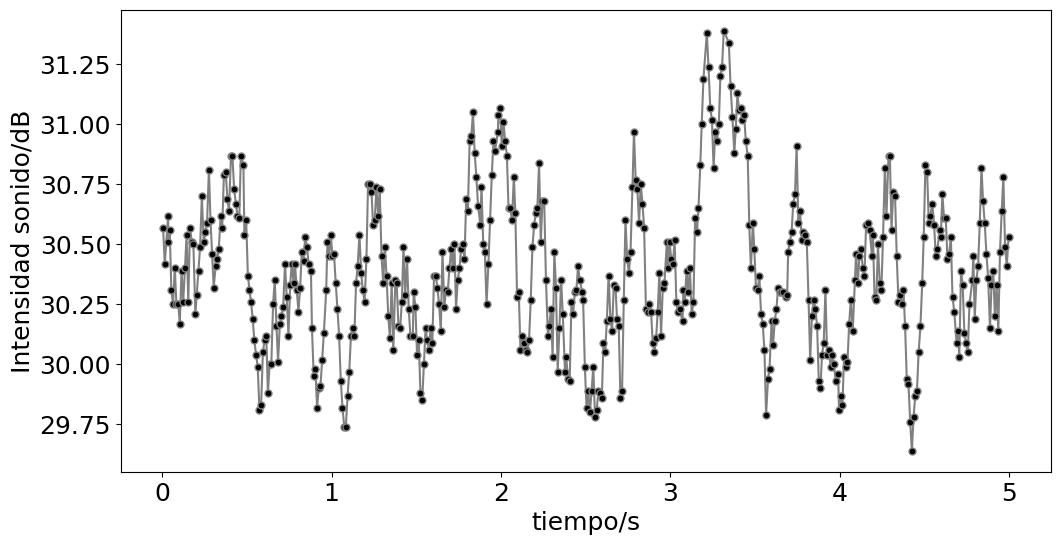

media = 30.381247484909455 dB y desv = 0.31583231871847595 dB
Total datos = 497


In [45]:
from scipy.stats import norm
dataB = np.copy(datosY)
datat = np.copy(datosX)
valC = 0.0
print(len(dataB))
while (valC < 0.5):
    media = np.mean(dataB)
    desv = np.std(dataB,ddof=1)
    disper = abs(dataB-media)
    if(np.max(disper)>3.0*desv):
        donde = np.where(disper==np.max(disper))[0][0]
        print('donde',donde,'val',dataB[donde])
        prob = 2*norm.sf(media + abs(dataB[donde]-media),loc=media,scale=desv)
        print('prob',prob)
        valC = len(dataB)*prob
        print('valC',valC)
        if(valC < 0.5):
            dataB = np.delete(dataB,donde)
            datat = np.delete(datat,donde)
            print(len(dataB))
    else: valC = 1.0; print('No hay más valores sesgados')


fig,ax = plt.subplots(1,figsize=(12,6))
ax.plot(datat,dataB,color='gray',marker='.',ms='10',markerfacecolor='k')
ax.set_xlabel('tiempo/s')
ax.set_ylabel('Intensidad sonido/dB')
#plt.savefig('imagenes/campoB.svg')
plt.show()    

# valor esperado y desviación estándar
media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
print('media = {} dB y desv = {} dB'.format(media,desv))
print('Total datos = {}'.format(len(dataB)))

## Incertidumbre dominante

In [46]:
rho = 28.935
m = 50.0
em = 0.1
L = 1.2
eL = 0.03

import numpy as no
erho = rho*np.sqrt((em/m)**2 + (3*eL/L)**2)
print('erho',erho)

erho 2.1708964628754175


$$ \alpha_{\rho} = \rho \Bigg[ \bigg(\frac{\alpha_m}{m}\bigg)^2 + \bigg(\frac{3\alpha_L}{L}\bigg)^2 \Bigg]^{1/2} = \big(28.935\,\text{g/cm}^3\big) \Bigg[ \bigg(\frac{0.1}{50.0}\bigg)^2 + \bigg(\frac{3\times 0.03}{1.20}\bigg)^2 \Bigg]^{1/2}  = 2.1709\,\text{g}\text{/cm}^3  $$

## Combinación de resultados

a = 599.9085193974977 \pm 0.0020707031063828675
af = 7.297352569230549e-03 +/- 1.1183763617311149e-12


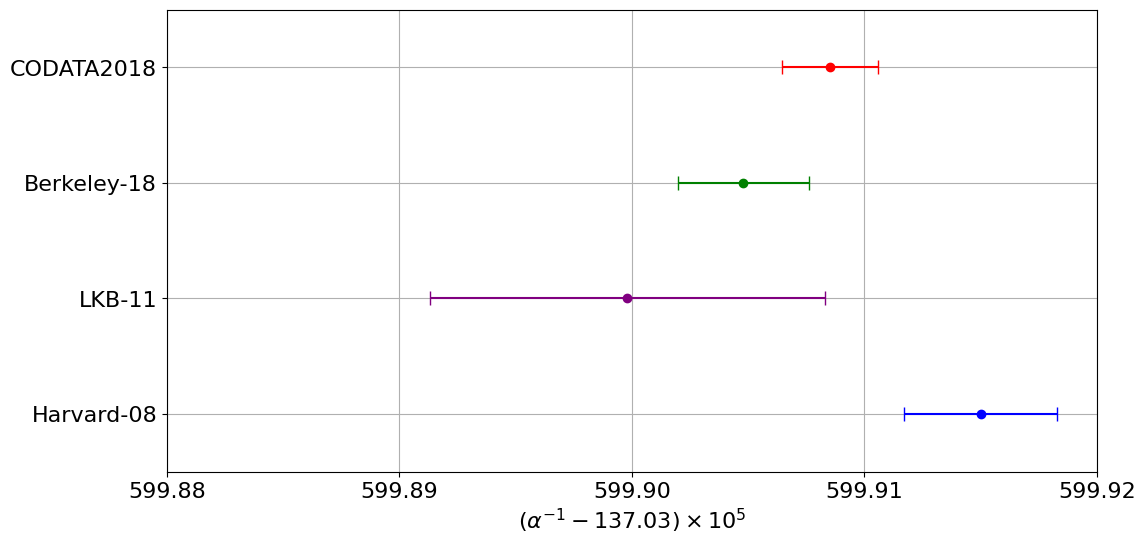

In [47]:
import numpy as np
import pylab as plt
plt.rcParams.update({'font.size':16})

a1 = 599.9150
ea1 = 0.0033
a2 = 599.8998
ea2 = 0.0085
a3 = 599.9048
ea3 = 0.0028

fig,ax = plt.subplots(1,figsize=(12,6))
ax.errorbar(a1,1,xerr=ea1,fmt='o',color='b',capsize=5)
ax.errorbar(a2,2,xerr=ea2,fmt='o',color='purple',capsize=5)
ax.errorbar(a3,3,xerr=ea3,fmt='o',color='g',capsize=5)

##

w1 = 1/ea1**2
w2 = 1/ea2**2
w3 = 1/ea3**2

am = (w1*a1 + w2*a2 +w3*a3)/(w1+w2+w3)
eam = 1/np.sqrt(w1+w2+w3)
print('a = {} \pm {}'.format(am,eam))


am_cal = 599.9085
eam_cal = 0.0021
af = 1/(am_cal*1e-5 + 137.03)
eaf = 1e-5*eam_cal/(eam_cal*1e-5 +137.03)**2
print('af = {:.15e} +/- {}'.format(af,eaf))

ax.errorbar(am,4,xerr=eam,fmt='o',color='r',capsize=5)
ax.set_yticks(range(1,4+1,1),['Harvard-08', 'LKB-11','Berkeley-18','CODATA2018'])
ax.set_ylim(0.5,4.5)
ax.set_xticks(np.arange(599.88,599.93,0.01))
ax.set_xlabel(r'$(\alpha^{-1} - 137.03)\times 10^{5}$')
#plt.savefig('imagenes/combiAlfa.svg')
plt.grid()

## Función densidad de probabilidad de t-student

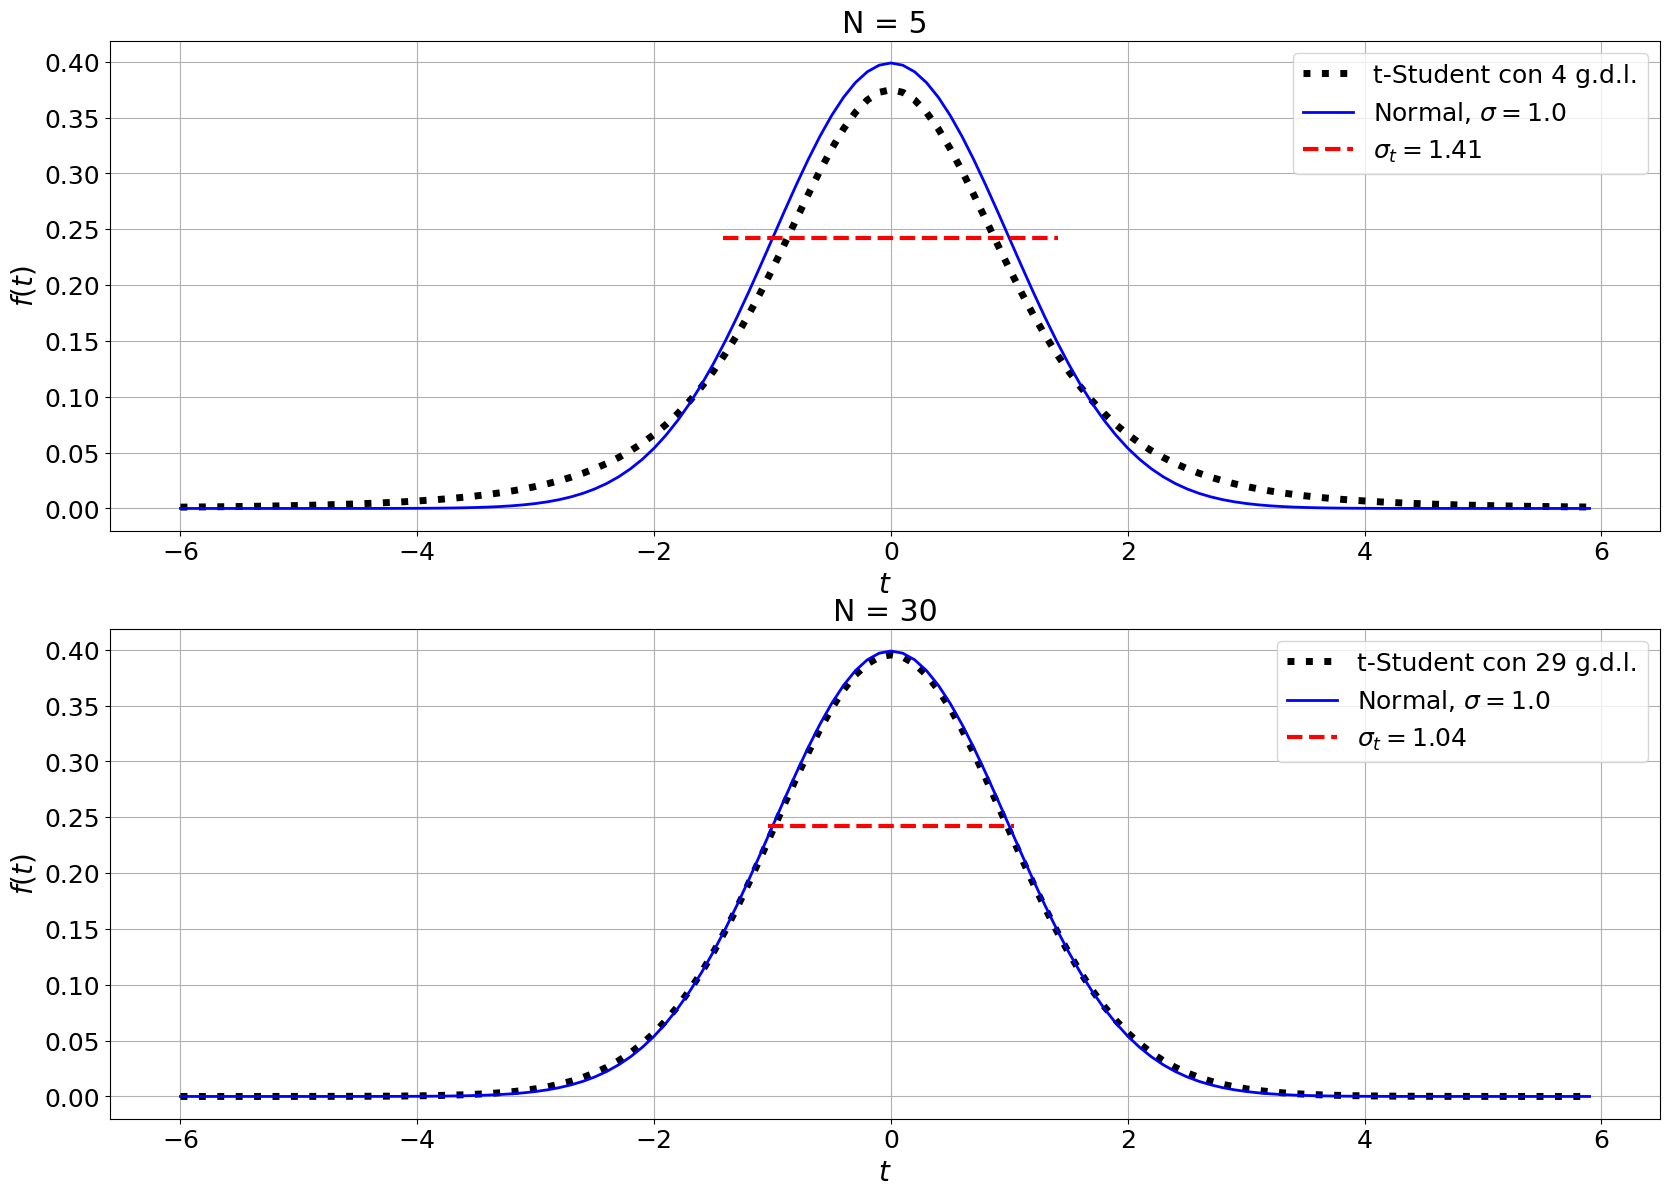

In [48]:
import numpy as np
from scipy import stats
from scipy import special
import pylab as plt

#############
# Variar el número de medidas
NN = np.array([5,30])
#############

plt.rcParams['figure.figsize'] = 20, 14
font = { 'size'   : 18}
plt.rc('font', **font)

fig, ax = plt.subplots(2,1)
for ii,N in enumerate(NN):

    n = N-1 # grados de libertad 
    sigmat = np.sqrt(n/(n-2)) # Desviación estándar de t
    t = np.arange(-6,6,0.1)
    beta = (special.gamma(0.5)*special.gamma(n/2))/special.gamma(0.5+n/2)
    ft = (1./(np.sqrt(n)*beta))*(1 + t**2/n)**(-(n+1)/2)

    mu = 0. # media aritmética
    sigma = 1. # desviación estándar
    x = np.arange(-6,6,0.1)
    f = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))


    ax[ii].plot(t,ft,linewidth=5,linestyle=':',color='k',label=r't-Student con {} g.d.l.'.format(n))
    ax[ii].plot(x,f,linewidth=2,color='blue',label='Normal, $\sigma = 1.0$')
    ax[ii].plot([mu-sigmat, mu+sigmat], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                    1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
             linestyle="--", color="red", solid_capstyle="butt", label='$\sigma_t = %.2f$' % sigmat)

    ax[ii].set_title('N = {}'.format(N))
    ax[ii].set_xlabel('$t$',fontsize=20)
    ax[ii].set_ylabel('$f(t)$',fontsize=20)
    ax[ii].legend()
    ax[ii].grid()

plt.savefig('imagenes/tstudent.svg')    
plt.show()

## Tabla valores distribución t-student

In [49]:
### Certezas #####################
N = 7     # Número de medidas
l = 1    # Número de ligaduras. El valor típico es uno porque se necesita la media para determinar la desviación estándar
unoMalpha = ['  ',0.68,0.95,0.997]   # certezas para determinar el factor de corrección
##################################


from tabulate import tabulate, SEPARATING_LINE
import numpy as np
from scipy import stats

table = [['g.d.l.','  ','Certeza','  '],unoMalpha,SEPARATING_LINE]

gdl = N - l
probs = [gdl]
for ii, val in enumerate(unoMalpha[1::]):
    aux = stats.t.interval(val,gdl,loc=0,scale=1) # loc sirve para desplazar la distribución, scale para escalarla.
    probs.append(round(aux[1],4))
table.append(probs)

print(tabulate(table,tablefmt='simple'))

------  -----  -------  ------
g.d.l.         Certeza
        0.68   0.95     0.997
------  -----  -------  ------
6       1.084  2.4469   4.8002
------  -----  -------  ------


## Residuos

popt [70.95772217 -9.0056939 ] 
error [0.70664679 0.6308763 ]


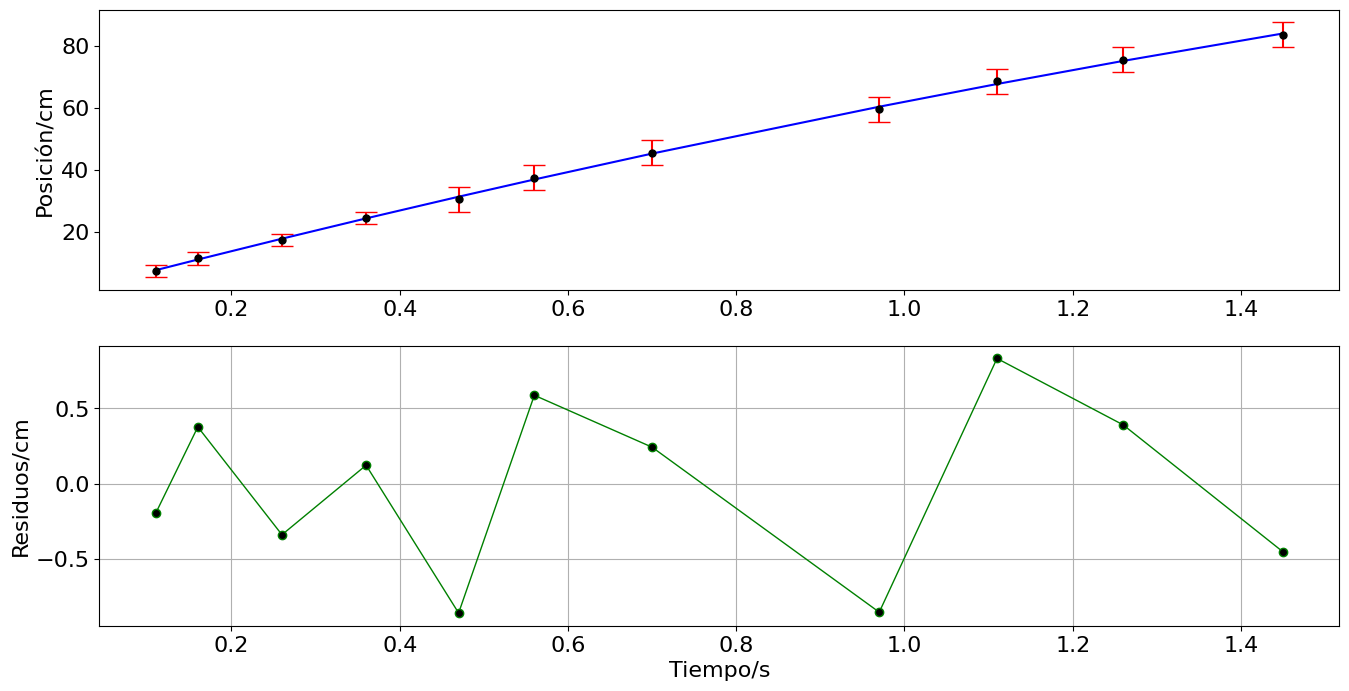

In [50]:
import numpy as np
import pylab as plt
plt.rcParams.update({'font.size': 16})

# Datos tiempo y posición
t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
#print('ex = {}'.format(ex))


# Se importa la función curve_fit
from scipy.optimize import curve_fit

# Se define la función del modelo nolineal
def desacelerar(t,v0,a):
    return  v0*t + a*t**2

# Se ejecuta curve_fit y se determinan las incertidumbres de los parámetros. Se imprimem en pantalla
popt,pcov = curve_fit(desacelerar,t,x,sigma=ex)
error = np.sqrt(np.diag(pcov))
print('popt',popt,'\nerror',error)

# Se construye una nueva gráfica incluyendo el ajuste
fig, ax = plt.subplots(2,figsize=(16,8))
ax[0].errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
ax[0].set_ylabel('Posición/cm')
ax[1].set_xlabel('Tiempo/s')
ax[0].plot(t,desacelerar(t,*popt),'b')


## Residuos
R = x-desacelerar(t,*popt)
ax[1].plot(t,R,'.-',ms=12,lw=1,c='g',mfc='k')
ax[1].set_ylabel('Residuos/cm')
ax[1].grid()

#plt.savefig('imagenes/residuos1.svg',format='svg')
plt.show()

popt [ 2.46531456 58.31327028] 
error [0.64784263 1.11052984]


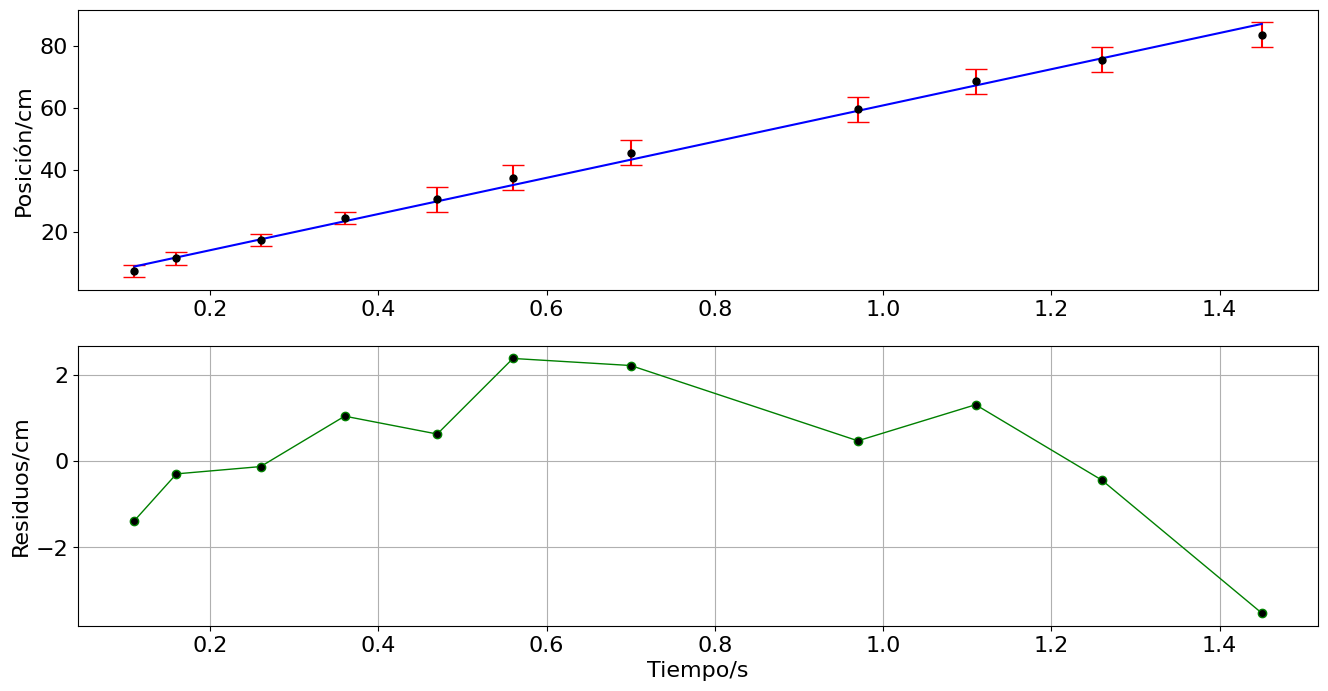

In [51]:
# Se define la función del modelo nolineal
def linea(t,v0,a):
    return  v0 + a*t

# Se ejecuta curve_fit y se determinan las incertidumbres de los parámetros. Se imprimem en pantalla
popt,pcov = curve_fit(linea,t,x,sigma=ex)
error = np.sqrt(np.diag(pcov))
print('popt',popt,'\nerror',error)

# Se construye una nueva gráfica incluyendo el ajuste
fig, ax = plt.subplots(2,figsize=(16,8))
ax[0].errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
ax[0].set_ylabel('Posición/cm')
ax[1].set_xlabel('Tiempo/s')
ax[0].plot(t,linea(t,*popt),'b')


## Residuos
R = x-linea(t,*popt)
ax[1].plot(t,R,'.-',ms=12,lw=1,c='g',mfc='k')
ax[1].set_ylabel('Residuos/cm')
ax[1].grid()

plt.savefig('imagenes/residuos2.svg',format='svg')
plt.show()

## Residuos normalizados

Incertidumbre jeringa = 0.05773502691896258 mL
Incertidumbre vaso = 1.0206207261596576 mL
Inverso densidad = ([1.01436594] +/- [[0.01481107]]) mL/g
Densidad = ([0.98583752] +/- [[0.01439451]]) g/mL


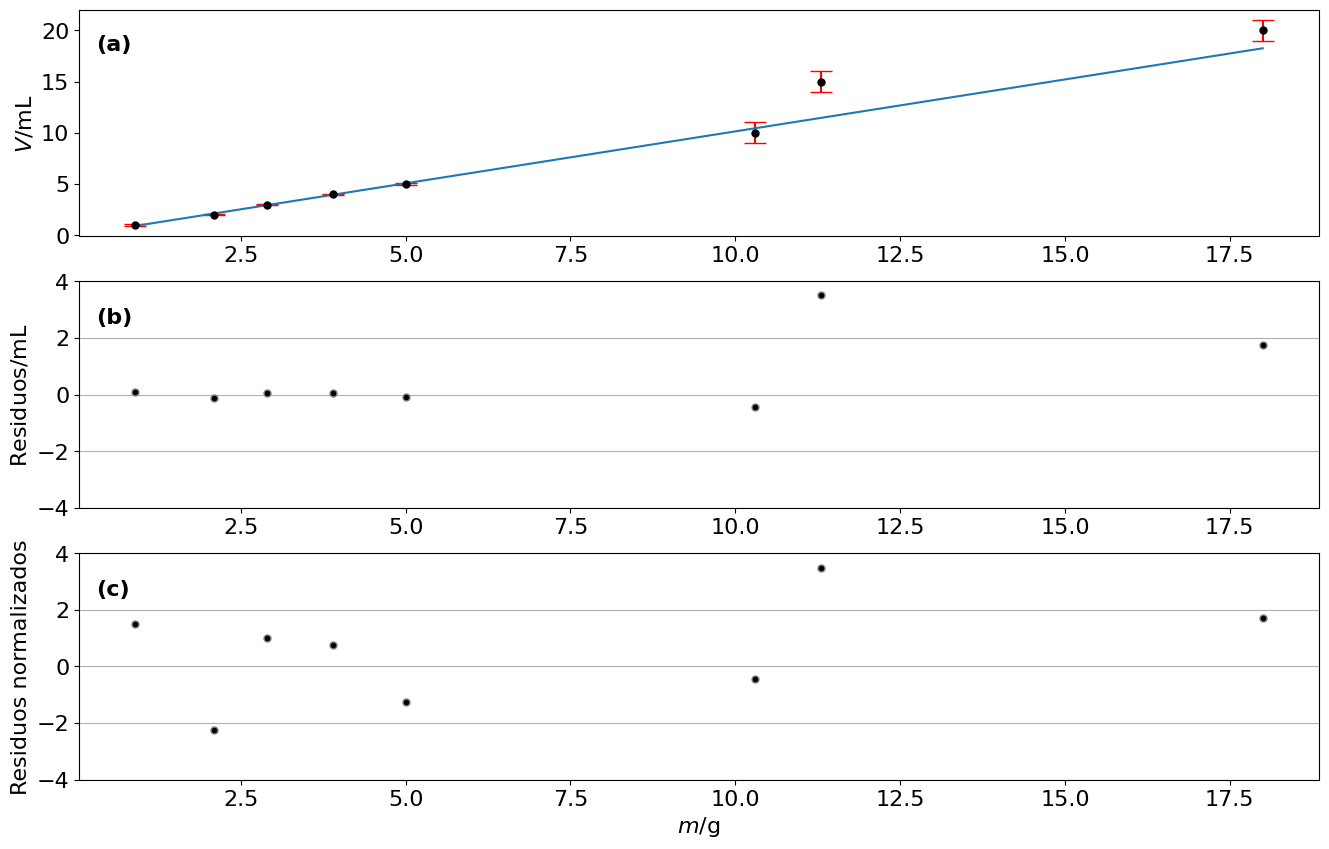

In [52]:
import numpy as np
import pylab as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size':16})

def densidad(m,invd):
    return invd*m

masas = np.array([0.9,2.1,2.9,3.9,5.0,10.3,11.3,18.0])
masas_e = 0.1
vols = np.array([1.0,2.0,3.0,4.0,5.0,10.0,15.0,20.0])

## Incertidumbre jeringa: no se puede apreciar bien, por lo que se toma la mitad de la resolución y se considera distribución uniforme
jer_e = (0.2)/np.sqrt(12)
print('Incertidumbre jeringa = {} mL'.format(jer_e))

## Incertidumbre jeringa: no se puede apreciar bien, por lo que se toma la mitad de la resolución y se considera distribución uniforme
vas_e = (5.0)/(2*np.sqrt(6))
print('Incertidumbre vaso = {} mL'.format(vas_e))

vols_e1 = np.ones(5)*jer_e
vols_e2 = np.ones(3)*vas_e
vols_e = np.append(vols_e1,vols_e2)

popt,pcov = curve_fit(densidad,masas,vols,sigma=vols_e)
print('Inverso densidad = ({} +/- {}) mL/g'.format(popt,np.sqrt(pcov)))
densi = 1/popt
densi_e = np.sqrt(pcov)/popt**2
print('Densidad = ({} +/- {}) g/mL'.format(densi,densi_e))


fig, ax = plt.subplots(3,figsize=(16,10))
ax[0].errorbar(masas,vols,yerr=vols_e,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
ax[0].plot(masas,densidad(masas,*popt))
ax[0].text(0.3,18,'(a)',fontweight='bold')
ax[0].set_ylabel('$V$/$\mathsf{mL}$')

## Residuos
R = vols-densidad(masas,*popt)
ax[1].plot(masas,R,'.',ms=10,color='gray',mfc='k')
ax[1].set_ylim(-4,4)
ax[1].grid(axis='y')
ax[1].text(0.3,2.5,'(b)',fontweight='bold')
ax[1].set_ylabel('Residuos/$\mathsf{mL}$')

## Residuos normalizados
Rn = R/vols_e
ax[2].plot(masas,Rn,'.',ms=10,color='gray',mfc='k')
ax[2].set_ylim(-4,4)
ax[2].grid(axis='y')
ax[2].text(0.3,2.5,'(c)',fontweight='bold')
ax[2].set_ylabel('Residuos normalizados')
ax[2].set_xlabel('$m/\mathsf{g}$')

#plt.savefig('imagenes/residuosNorm.svg')
plt.show()

ubica [6] valor [3.466189516460435] tiempo [11.3] proba [0.0005278910416792382] valC [0.004223128333433906]
El valor 3.466189516460435 fue eliminado porque valC = 0.004223128333433906


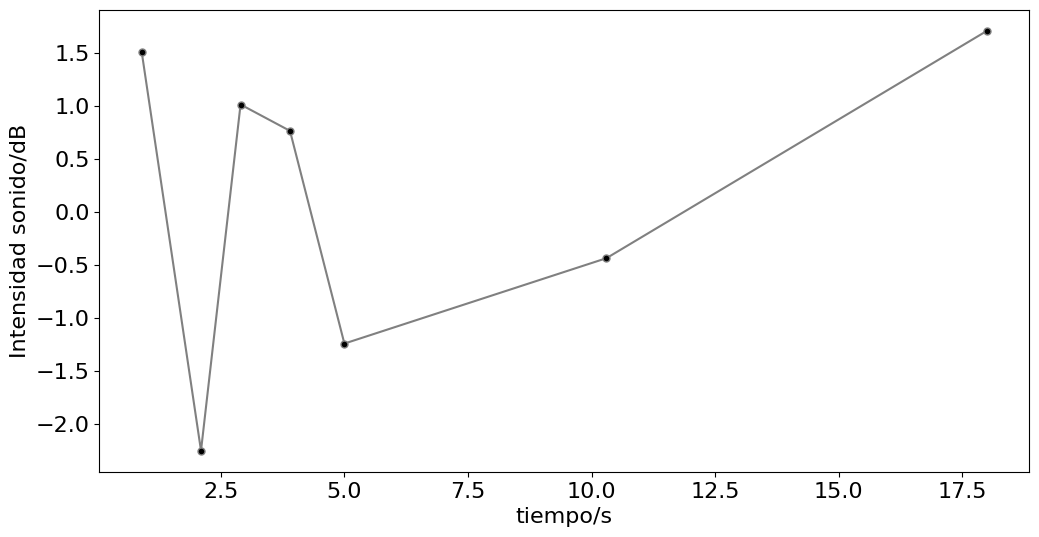

media = 0.14982808554659605 dB y desv = 1.4973992265828584 dB
Total datos = 7


In [53]:
## Aplicación del criterio de Chauvenet's

from scipy.stats import norm

criterio = 2.5
dataB = np.copy(Rn)
datat = np.copy(masas)

#media = np.mean(dataB)
media = 0.0
#desv = np.std(dataB,ddof=1)
desv = 1.0
disper = abs(dataB-media)
ubica = []
valor = []
valC = []
tiempo = []
proba = []
for ii in range(len(disper)):
    if(np.max(disper[ii])>criterio*desv):
        ubica.append(ii)
        valor.append(dataB[ii])
        tiempo.append(datat[ii])
        prob = 2*norm.sf(media + abs(dataB[ii]-media),loc=media,scale=desv)
        proba.append(prob)
        valC.append(len(dataB)*prob)
print('ubica',ubica,'valor',valor,'tiempo',tiempo,'proba',proba,'valC',valC)

ubica = np.asarray(ubica)
for ii in range(len(valC)):
    if(valC[ii] < 0.5):
        dataB = np.delete(dataB,ubica[ii])
        datat = np.delete(datat,ubica[ii])
        ubica = ubica - 1
        print('El valor {} fue eliminado porque valC = {}'.format(valor[ii],valC[ii]))

media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
fig,ax = plt.subplots(1,figsize=(12,6))
ax.plot(datat,dataB,color='gray',marker='.',ms='10',markerfacecolor='k')
ax.set_xlabel('tiempo/s')
ax.set_ylabel('Intensidad sonido/dB')
#plt.savefig('imagenes/sonido-chauvenet.svg')
plt.show()    

# valor esperado y desviación estándar
media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
print('media = {} dB y desv = {} dB'.format(media,desv))
print('Total datos = {}'.format(len(dataB)))

Incertidumbre jeringa = 0.05773502691896258 mL
Incertidumbre vaso = 1.0206207261596576 mL
Inverso densidad = ([1.0120492] +/- [[0.01166385]]) mL/g
Densidad = ([0.98809426] +/- [[0.01138777]]) g/mL


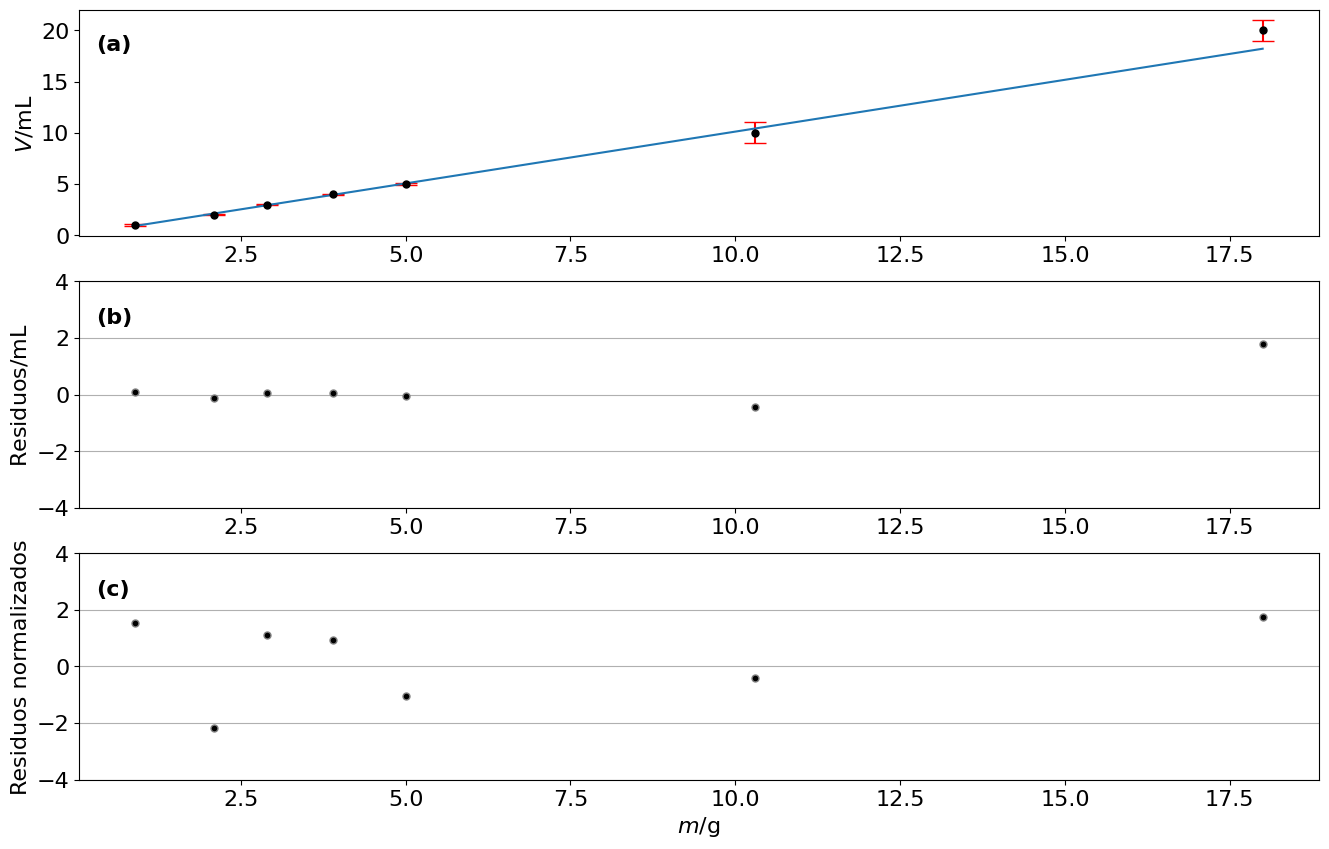

In [54]:
masas = np.array([0.9,2.1,2.9,3.9,5.0,10.3,18.0])
masas_e = 0.1
vols = np.array([1.0,2.0,3.0,4.0,5.0,10.0,20.0])

## Incertidumbre jeringa: no se puede apreciar bien, por lo que se toma la mitad de la resolución y se considera distribución uniforme
jer_e = (0.2)/np.sqrt(12)
print('Incertidumbre jeringa = {} mL'.format(jer_e))

## Incertidumbre jeringa: no se puede apreciar bien, por lo que se toma la mitad de la resolución y se considera distribución uniforme
vas_e = (5.0)/(2*np.sqrt(6))
print('Incertidumbre vaso = {} mL'.format(vas_e))

vols_e1 = np.ones(5)*jer_e
vols_e2 = np.ones(2)*vas_e
vols_e = np.append(vols_e1,vols_e2)

popt,pcov = curve_fit(densidad,masas,vols,sigma=vols_e)
print('Inverso densidad = ({} +/- {}) mL/g'.format(popt,np.sqrt(pcov)))
densi = 1/popt
densi_e = np.sqrt(pcov)/popt**2
print('Densidad = ({} +/- {}) g/mL'.format(densi,densi_e))


fig, ax = plt.subplots(3,figsize=(16,10))
ax[0].errorbar(masas,vols,yerr=vols_e,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
ax[0].plot(masas,densidad(masas,*popt))
ax[0].text(0.3,18,'(a)',fontweight='bold')
ax[0].set_ylabel('$V$/$\mathsf{mL}$')

## Residuos
R = vols-densidad(masas,*popt)
ax[1].plot(masas,R,'.',ms=10,color='gray',mfc='k')
ax[1].set_ylim(-4,4)
ax[1].grid(axis='y')
ax[1].text(0.3,2.5,'(b)',fontweight='bold')
ax[1].set_ylabel('Residuos/$\mathsf{mL}$')

## Residuos normalizados
Rn = R/vols_e
ax[2].plot(masas,Rn,'.',ms=10,color='gray',mfc='k')
ax[2].set_ylim(-4,4)
ax[2].grid(axis='y')
ax[2].text(0.3,2.5,'(c)',fontweight='bold')
ax[2].set_ylabel('Residuos normalizados')
ax[2].set_xlabel('$m/\mathsf{g}$')

#plt.savefig('imagenes/residuosNorm.svg')
plt.show()

## Densidad de probabilidad de chi-cuadrado

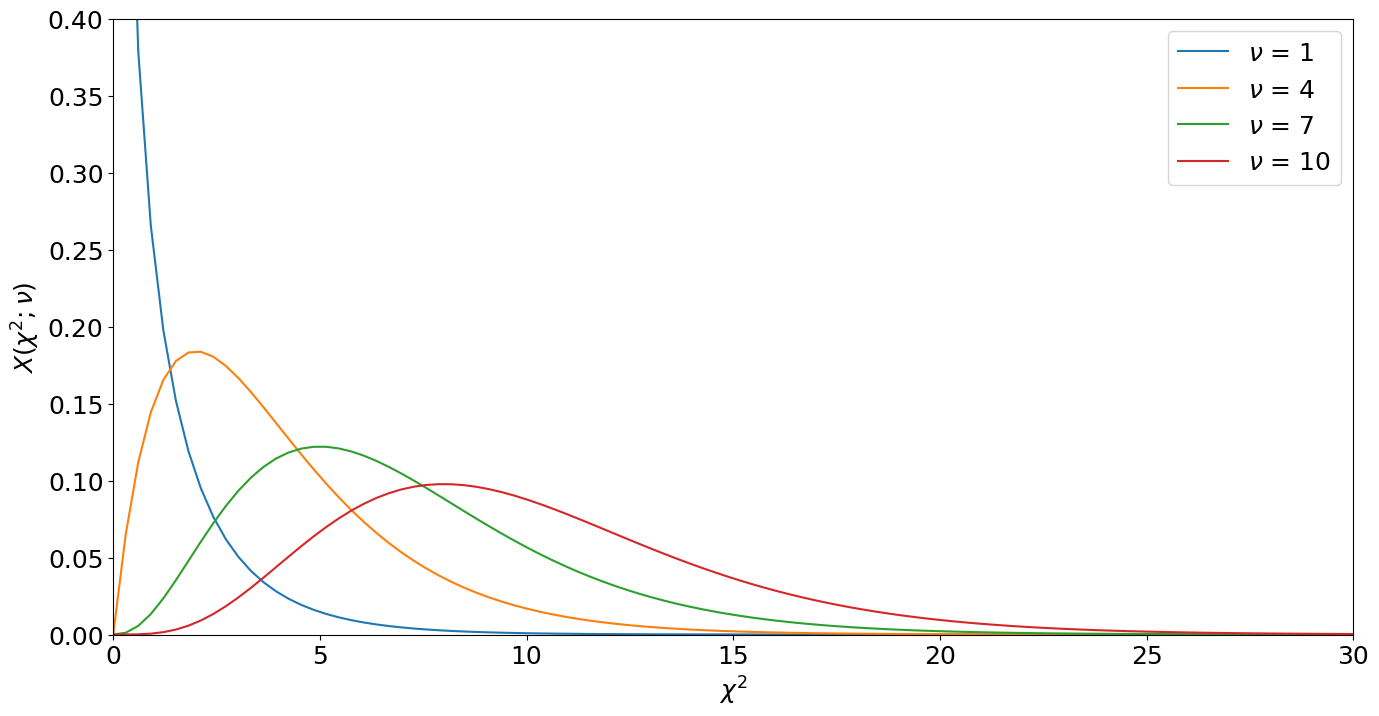

In [55]:
##### Definición de grados de libertad ####
num = 1    # grado de libertad menor
nuM = 11    # grado de libertad mayor
paso = 3
###########################################

import numpy as np
from scipy.special import gamma
import pylab as plt
plt.rcParams.update({'font.size':18})

def chiCuadrado(x2,nu):
    return x2**(nu/2-1)*np.exp(-x2/2)/(2**(nu/2)*gamma(nu/2))

nu = np.arange(num, nuM +1, paso).astype(int) 

fig, ax = plt.subplots(1,figsize=(16,8))
for ii in nu:
    xs = np.linspace(1e-18,30,100)
    ax.plot(xs,chiCuadrado(xs,ii),label=r'$\nu$ = {}'.format(ii))

ax.set_ylim(0,0.4)
ax.set_xlim(0,30)
ax.set_xlabel(r'$\chi^2$')
ax.set_ylabel(r'$X(\chi^2;\nu)$')
ax.legend()
#plt.savefig('imagenes/pdfChi.svg')
plt.show()

## Probabilidad acumulada de chi-cuadrado

In [56]:
##### Definición de grados de libertad ####
num = 1    # grado de libertad menor
nuM = 10   # grado de libertad mayor
paso = 3
###########################################

import numpy as np
from scipy.stats import chi2
import pylab as plt
plt.rcParams.update({'font.size':18})

nu = np.arange(num, nuM +1, paso).astype(int) 

fig, ax = plt.subplots(1,figsize=(16,8))
for ii in nu:
    xs = np.linspace(1e-18,30,100)
    probC = 1- chi2.cdf(xs,ii)
    ax.plot(xs,probC,label=r'$\nu$ = {}'.format(ii))

ax.set_ylim(0,1.0)
ax.set_xlim(0,30)
ax.set_xlabel(r'$\chi^2_{min}$')
ax.set_ylabel(r'$P(\chi^2_{min} \leq \chi^2)$')
ax.legend()
#plt.savefig('imagenes/pdfChiCum.svg')
plt.show()

## Prueba de chi-cuadrado para una distibución de datos

Distribución de diámetros de canicas

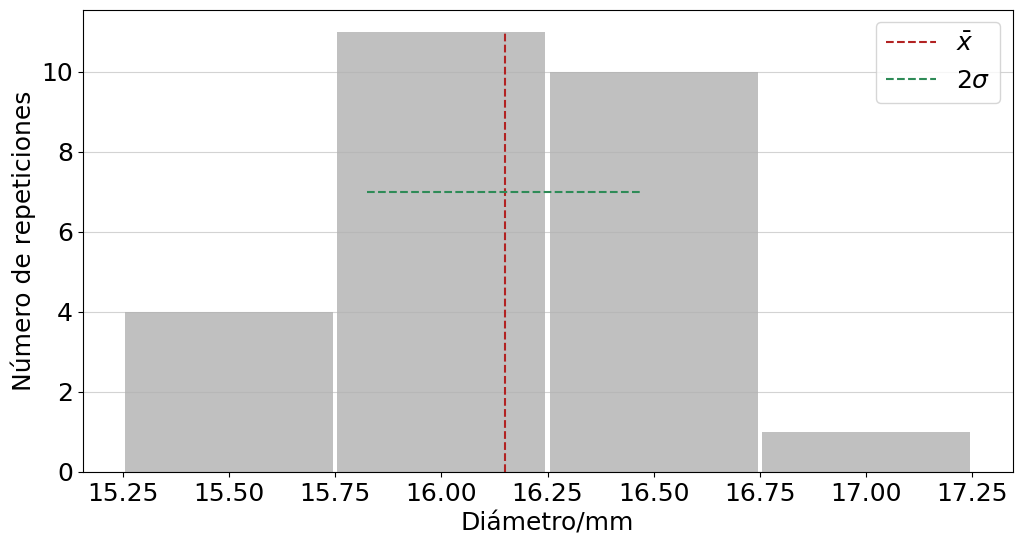

El diámetro promedio es 16.2 mm con una desviación estándar de 0.3 mm.


In [57]:
import numpy as np
import pylab as plt
Ds = np.array([15.40,16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.85,16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              15.45,17.00,16.40,16.50,15.90,15.65,15.55,16.60,15.70,15.30]) # en mm, incertidumbre de 0.05 mm

Ds2 = np.array([16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              16.40,16.50,15.90,15.65,15.55,16.60,15.70,16.85]) # en mm, incertidumbre de 0.05 mm


media = np.mean(Ds2)
devS = np.std(Ds2,ddof=1)

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,6))
plt.hist(Ds2, bins=[15.25,15.75,16.25,16.75,17.25], rwidth=0.98,
                   color='silver',density=False,cumulative=False,align='mid')
plt.vlines(media,0,11,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(7,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
#plt.title('Diámetro de canicas')
plt.xlabel('Diámetro/mm')
plt.ylabel(r'Número de repeticiones')
plt.legend()
plt.grid(axis='y', alpha=0.55)
#plt.savefig('imagenes/histoCanicas.svg')
plt.show()

print('El diámetro promedio es {:.1f} mm con una desviación estándar de {:.1f} mm.'.format(media,devS))

Como se quiere verificar que la distribución de los datos se corresponde con una distribución normal, el número de parámetros que se deben determinar con los datos de la muestra son dos: media y desviación estándar, luego el número de ligaduras es tres, y el número mínimo de intervalos es cuatro. El histograma anterior tiene efectivamente 4 intervalos, pero dos de ellos tienen menos de cinco datos, por lo que se tienen que redefinir los intervalos. Como la distribución es normal, se supone simétrica con respecto a la media, así que el numero de intervalos será par, la mitad antes de la media.

In [58]:
from scipy.stats import norm,chi2

gdl = 1
ns = len(Ds2)
paso = devS
Interv =  np.array([media-2*paso,media-0.61*paso,media,media+0.61*paso,media+2*paso]) # para Ds2, más con un 4
#Interv =  np.array([media-2*paso,media-0.65*paso,media,media+0.64*paso,media+2*paso]) # para Ds2, más con un 4
#Interv =  np.array([media-2*paso,media-0.9*paso,media,0.992*media+2*paso/2,media+2*paso]) # para Ds

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,6))
info = plt.hist(Ds2, bins=Interv, rwidth=0.98,
                   color='silver',density=False,cumulative=False,align='mid')
plt.vlines(media,0,11,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(7,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
#plt.title('Diámetro de canicas')
plt.xlabel('Diámetro/mm')
plt.ylabel(r'Número de repeticiones')
plt.legend()
plt.grid(axis='y', alpha=0.55)
#plt.savefig('imagenes/histoCanicas2.svg')
plt.show()

def probaG(x1,x2,media,desv):
    return norm.cdf(x2,media,desv) - norm.cdf(x1,media,desv)

Es = ns*probaG(info[1][0:-1],info[1][1::],media, devS)

chi = np.sum((info[0]-Es)**2/Es)
print('Valor chi-cuadrado = {}'.format(chi))
probC = 1 - chi2.cdf(chi,gdl)
print('Probabilidad = {} %'.format(probC*100))

Valor chi-cuadrado = 0.2318963311071656
Probabilidad = 63.01212786867462 %


## Prueba de chi-cuadrado para ajuste de datos

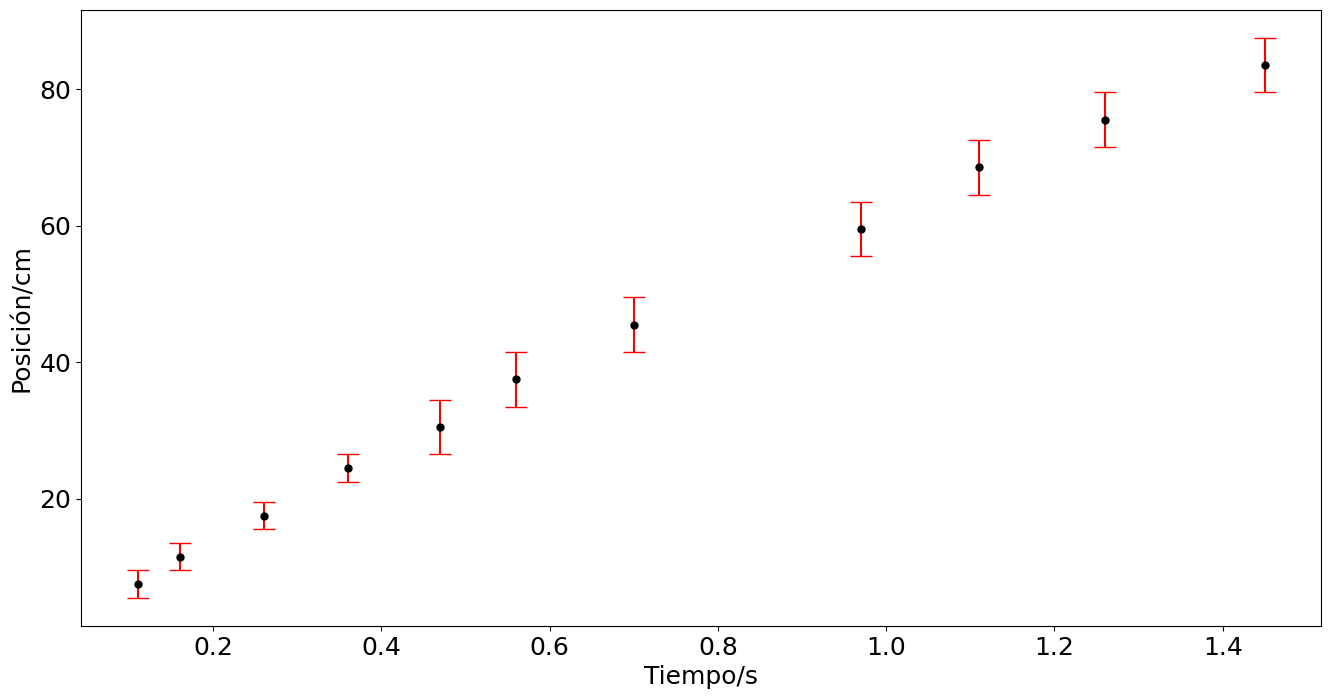

popt [70.95772217 -9.0056939 ] 
error [0.70664679 0.6308763 ]
popt2 [61.48814391] 
error2 [1.12314226]


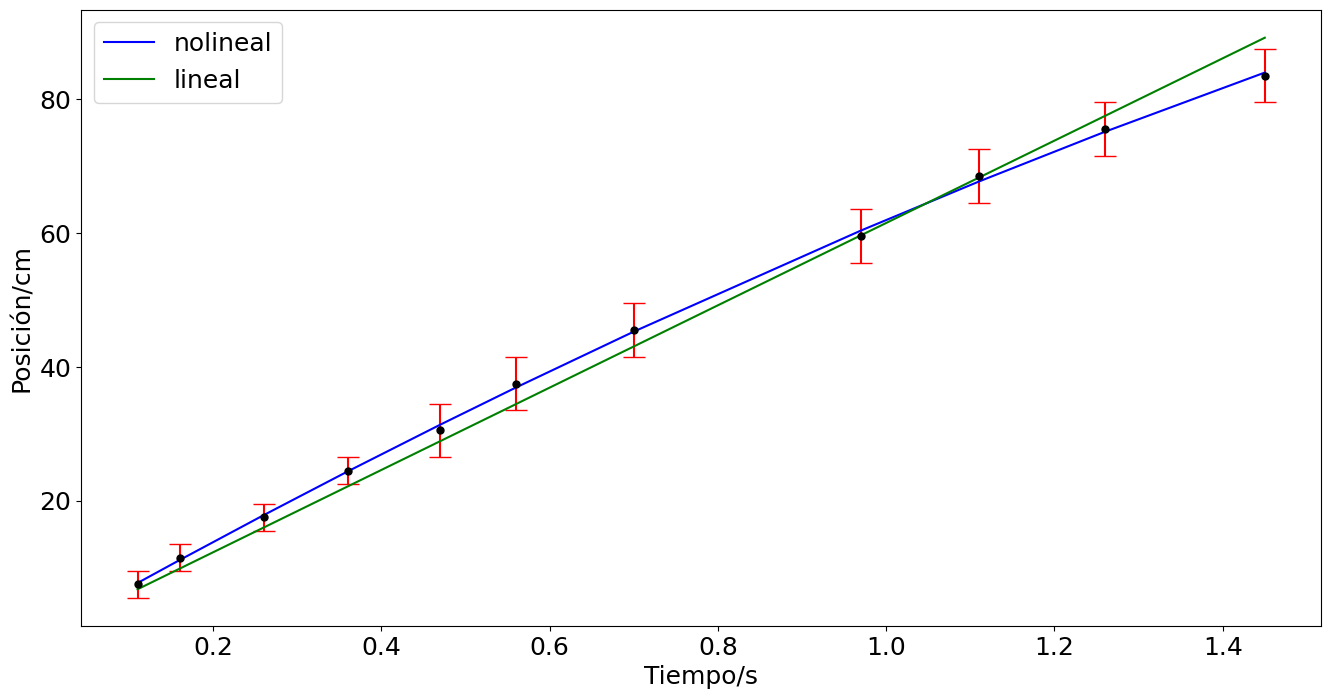

Nolineal: chi2 = 0.2610253249486865
Lineal: chi2 = 6.171006234668804
gdl nolineal = 9, y lineal = 10
Probabilidad nolineal = 99.99981999269535 %
Probabilidad lineal = 80.069717396758 %


In [59]:
import numpy as np
from scipy.stats import chi2
import pylab as plt
plt.rcParams.update({'font.size': 18})

# Datos tiempo y posición
t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
#print('ex = {}'.format(ex))

#Graficación
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.show()

# Se importa la función curve_fit
from scipy.optimize import curve_fit

# Se define la función del modelo nolineal
def desacelerar(t,v0,a):
    return  v0*t + a*t**2

# Se define la función lineal
def cte(t,v0):
    return v0*t

# Se ejecuta curve_fit y se determinan las incertidumbres de los parámetros. Se imprimem en pantalla
popt,pcov = curve_fit(desacelerar,t,x,sigma=ex)
error = np.sqrt(np.diag(pcov))
print('popt',popt,'\nerror',error)

# Lineal
popt2,pcov2 = curve_fit(cte,t,x,sigma=ex)
error2 = np.sqrt(np.diag(pcov2))
print('popt2',popt2,'\nerror2',error2)

# Se construye una nueva gráfica incluyendo el ajuste
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.plot(t,desacelerar(t,*popt),'b',label='nolineal')
plt.plot(t,cte(t,*popt2),'g',label='lineal')
plt.legend()
#plt.savefig('imagenes/bolaChi1.svg')
plt.show()

def chi2curva(yexp,yteo,sigma):
    return np.sum((yexp-yteo)**2/sigma**2)

chi2nl = chi2curva(x,desacelerar(t,*popt),ex)
print('Nolineal: chi2 = {}'.format(chi2nl))
chi2l = chi2curva(x,cte(t,*popt2),ex)
print('Lineal: chi2 = {}'.format(chi2l))

gdlnl = len(x) - 2
gdll = len(x) - 1
print('gdl nolineal = {}, y lineal = {}'.format(gdlnl,gdll))

probCnl = 1 - chi2.cdf(chi2nl,gdlnl)
print('Probabilidad nolineal = {} %'.format(probCnl*100))
probCl = 1 - chi2.cdf(chi2l,gdll)
print('Probabilidad lineal = {} %'.format(probCl*100))

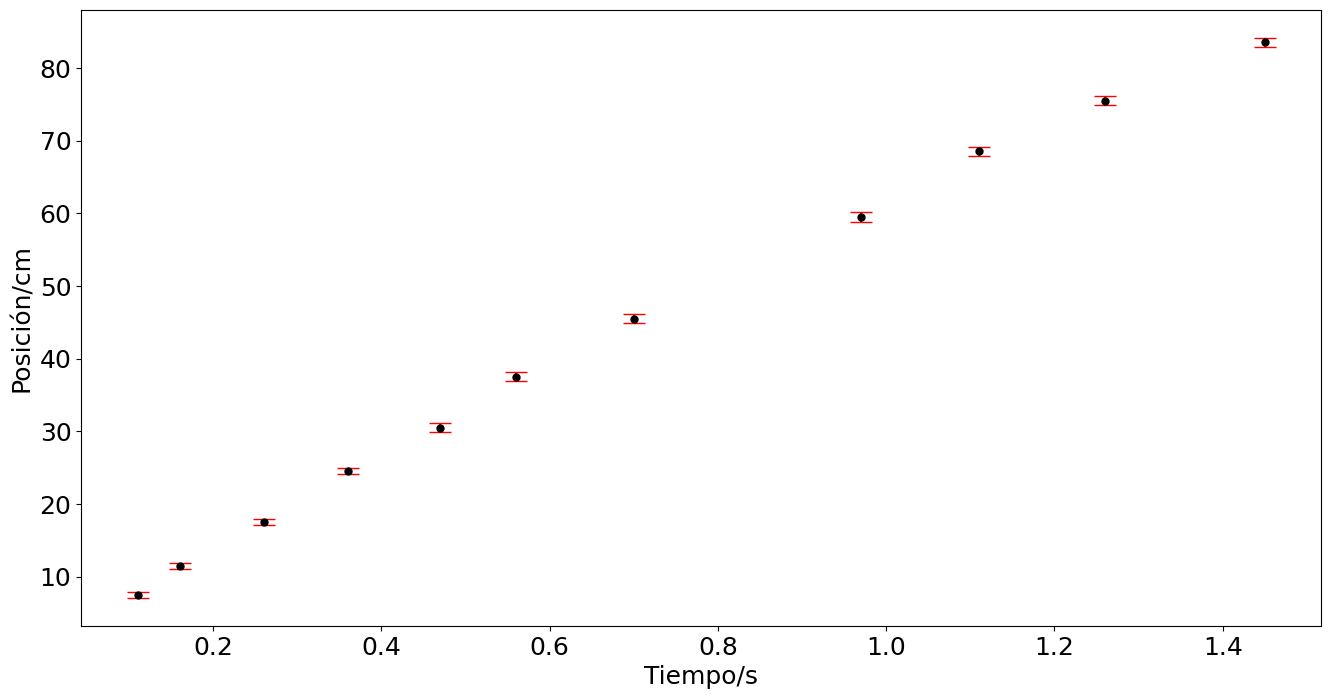

popt [70.96958555 -9.01556544] 
error [0.75229907 0.65745629]
popt2 [61.16878599] 
error2 [1.04225464]


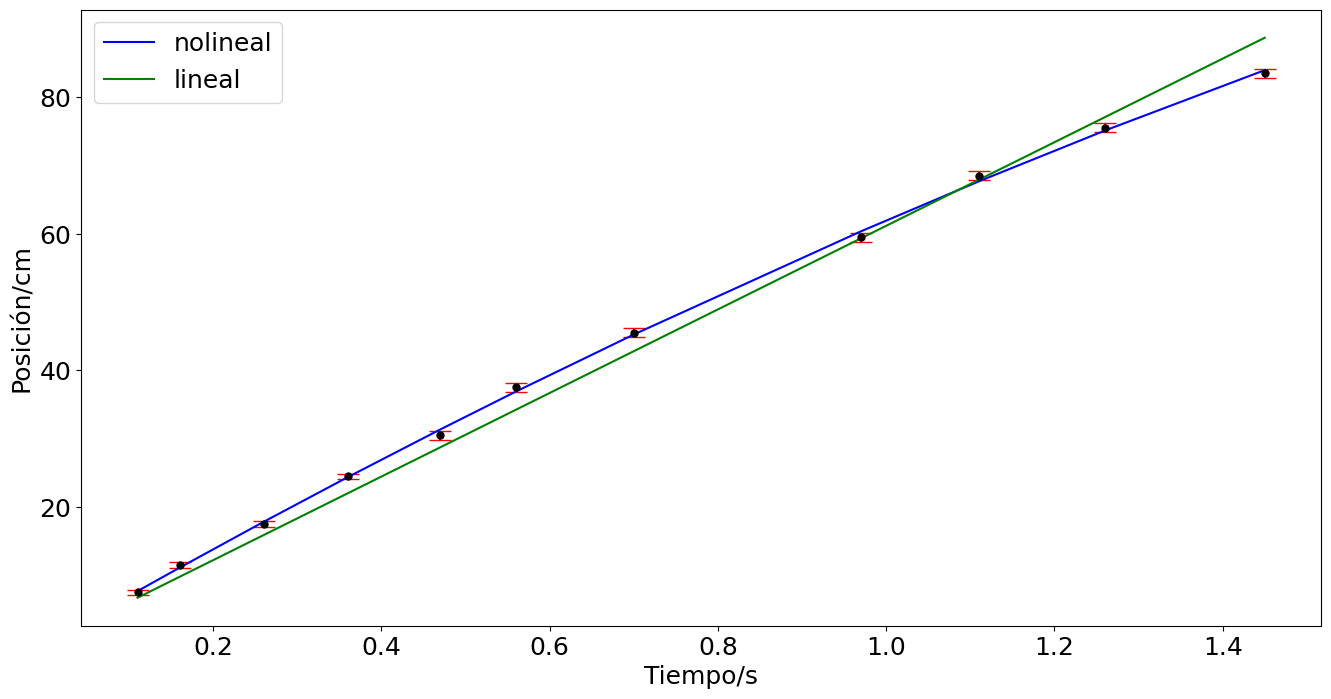

Nolineal: chi2 = 8.901181566085512
Lineal: chi2 = 194.8773627564422
gdl nolineal = 9, y lineal = 10
Probabilidad nolineal = 44.644563831909736 %
Probabilidad lineal = 0.0 %


In [60]:
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2/(1*np.sqrt(12)) # Error estimado en la posición


## Determinación del error del desplazamiento
ex = np.sqrt((e)**2 + e[0]**2)
#print('ex = {}'.format(ex))

#Graficación
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.show()

# Se define la función del modelo nolineal
def desacelerar(t,v0,a):
    return  v0*t + a*t**2

# Se define la función lineal
def cte(t,v0):
    return v0*t

# Se ejecuta curve_fit y se determinan las incertidumbres de los parámetros. Se imprimem en pantalla
popt,pcov = curve_fit(desacelerar,t,x,sigma=ex)
error = np.sqrt(np.diag(pcov))
print('popt',popt,'\nerror',error)

# Lineal
popt2,pcov2 = curve_fit(cte,t,x,sigma=ex)
error2 = np.sqrt(np.diag(pcov2))
print('popt2',popt2,'\nerror2',error2)

# Se construye una nueva gráfica incluyendo el ajuste
plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.plot(t,desacelerar(t,*popt),'b',label='nolineal')
plt.plot(t,cte(t,*popt2),'g',label='lineal')
plt.legend()
#plt.savefig('imagenes/bolaChi2.svg')
plt.show()

def chi2curva(yexp,yteo,sigma):
    return np.sum((yexp-yteo)**2/sigma**2)

chi2nl = chi2curva(x,desacelerar(t,*popt),ex)
print('Nolineal: chi2 = {}'.format(chi2nl))
chi2l = chi2curva(x,cte(t,*popt2),ex)
print('Lineal: chi2 = {}'.format(chi2l))

gdlnl = len(x) - 2
gdll = len(x) - 1
print('gdl nolineal = {}, y lineal = {}'.format(gdlnl,gdll))

probCnl = 1 - chi2.cdf(chi2nl,gdlnl)
print('Probabilidad nolineal = {} %'.format(probCnl*100))
probCl = 1 - chi2.cdf(chi2l,gdll)
print('Probabilidad lineal = {} %'.format(probCl*100))